<div align="center">

#### Lab 3

# National Tsing Hua University

#### Spring 2025

#### 11320IEEM 513600

#### Deep Learning and Industrial Applications
    
## Lab 3: Anomaly Detection in Industrial Applications

</div>

### Introduction

In today's industrial landscape, the ability to detect anomalies in manufacturing processes and products is critical for maintaining quality, efficiency, and safety. This lab focuses on leveraging deep learning techniques for anomaly detection in various industrial applications, using the MVTEC Anomaly Detection Dataset. By employing ImageNet-pretrained models available in torchvision, students will gain hands-on experience in classfying defects and irregularities across different types of industrial products.

Throughout this lab, you'll be involved in the following key activities:
- Explore and process the MVTec Anomaly Detection Dataset.
- Apply ImageNet-pretrained models from [Torchvision](https://pytorch.org/vision/stable/models.html) to detect anomalies in industrial products.
- Evaluate the performance of the models to understand their effectiveness in real-world industrial applications.

### Objectives

- Understand the principles of anomaly detection in the context of industrial applications.
- Learn how to implement and utilize ImageNet-pretrained models for detecting anomalies.
- Analyze and interpret the results of the anomaly detection models to assess their practicality in industrial settings.

### Dataset

The MVTec AD Dataset is a comprehensive collection of high-resolution images across different categories of industrial products, such as bottles, cables, and metal nuts, each with various types of defects. This dataset is pivotal for developing and benchmarking anomaly detection algorithms. You can download our lab's dataset [here](https://drive.google.com/file/d/19600hUOpx0hl78TdpdH0oyy-gGTk_F_o/view?usp=share_link). You can drop downloaded data and drop to colab, or you can put into yor google drive.

### References
- [MVTec AD Dataset](https://www.kaggle.com/datasets/ipythonx/mvtec-ad/data) for the dataset used in this lab.
- [Torchvision Models](https://pytorch.org/vision/stable/models.html) for accessing ImageNet-pretrained models to be used in anomaly detection tasks.
- [State-of-the-Art Anomaly Detection on MVTec AD](https://paperswithcode.com/sota/anomaly-detection-on-mvtec-ad) for insights into the latest benchmarks and methodologies in anomaly detection applied to the MVTec AD dataset.
- [CVPR 2019: MVTec AD — A Comprehensive Real-World Dataset for Unsupervised Anomaly Detection] for the original paper of MVTec AD dataset.

In [1]:
import glob
import matplotlib.pyplot as plt
import random
from tqdm.auto import tqdm
import cv2
import numpy as np

c:\Users\eason\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#from google.colab import drive

#drive.mount('/content/drive')
#!tar -xvf drive/MyDrive/cable.tar.gz cable

In [3]:
file_paths = glob.glob('toothbrush/*/*.png')
file_paths = sorted([path for path in file_paths if path.split('/')[-1] in [f'{i:03}.png' for i in range(10)]])

In [4]:
#all_data = []

#for img in tqdm(file_paths):
#    img = cv2.imread(img)
#    img = img[..., ::-1]
#    all_data.append(img)

#all_data = np.stack(all_data)
#print(all_data.shape)

import os
import glob
import cv2
import numpy as np
from tqdm import tqdm

# 改這裡的資料夾名稱 & 確保你是用相對路徑或絕對路徑
file_paths = glob.glob(os.path.join('toothbrush', 'test', '*', '*.png'))

print(f"圖片數量：{len(file_paths)}")
print("範例圖片路徑：", file_paths[:3])

all_data = []

for img_path in tqdm(file_paths):
    img = cv2.imread(img_path)
    if img is None:
        print(f"⚠️ 圖片讀取失敗：{img_path}")
        continue
    img = img[..., ::-1]  # BGR → RGB
    all_data.append(img)

if all_data:
    all_data = np.stack(all_data)
    print(f"成功載入圖片，shape：{all_data.shape}")
else:
    print("❌ 沒有成功讀取任何圖片，請確認路徑是否正確。")


圖片數量：42
範例圖片路徑： ['toothbrush\\test\\defective\\000.png', 'toothbrush\\test\\defective\\001.png', 'toothbrush\\test\\defective\\002.png']


100%|██████████| 42/42 [00:01<00:00, 25.02it/s]


成功載入圖片，shape：(42, 1024, 1024, 3)


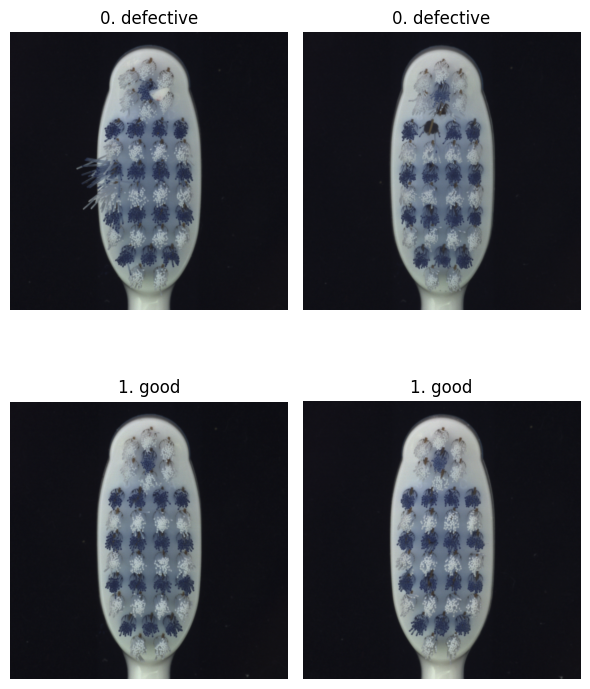

In [5]:
# #import matplotlib.pyplot as plt
# #import numpy as np

# classes = sorted(set([path.split('/')[1] for path in file_paths]))
# print(f'Classes: {classes}')

# images_per_class = len(all_data) // len(classes)
# fig, axs = plt.subplots(len(classes), 2, figsize=(6, 4 * len(classes)))

# for i, class_name in enumerate(classes):
#     index = i * images_per_class
#     for j in range(2):
#         axs[i, j].set_title(f'{i}. {class_name}')
#         axs[i, j].imshow(all_data[index + j])
#         axs[i, j].axis('off')

# plt.tight_layout()
# plt.show()

# import matplotlib.pyplot as plt
# import os
# import numpy as np

# # 取得類別名稱
# classes = sorted(set([os.path.normpath(path).split(os.sep)[2] for path in file_paths]))
# print(f'Classes: {classes}')

# # 圖片數量平均分配來畫
# images_per_class = len(all_data) // len(classes)
# fig, axs = plt.subplots(len(classes), 2, figsize=(6, 4 * len(classes)))

# for i, class_name in enumerate(classes):
#     index = i * images_per_class
#     for j in range(2):
#         axs[i, j].imshow(all_data[index + j])
#         axs[i, j].set_title(f'{i}. {class_name}')
#         axs[i, j].axis('off')

# plt.tight_layout()
# plt.show()

import matplotlib.pyplot as plt
import os
import numpy as np
from collections import defaultdict
from PIL import Image

# 建立一個 dictionary 依類別分群
class_to_imgs = defaultdict(list)

for path in file_paths:
    label = os.path.normpath(path).split(os.sep)[2]
    class_to_imgs[label].append(path)

# 開始畫圖
fig, axs = plt.subplots(len(class_to_imgs), 2, figsize=(6, 4 * len(class_to_imgs)))

for i, (label, paths) in enumerate(class_to_imgs.items()):
    for j in range(2):
        img = cv2.imread(paths[j])
        img = img[..., ::-1]  # BGR to RGB
        axs[i, j].imshow(img)
        axs[i, j].set_title(f'{i}. {label}')
        axs[i, j].axis('off')

plt.tight_layout()
plt.show()



## A. Data Loading and Preprocessing

In [6]:
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split
import numpy as np

num_classes = 8
images_per_class = 10
train_images_per_class = int(images_per_class * 0.8)
val_images_per_class = int(images_per_class * 0.2)

x_train = []
x_val = []

for i in range(num_classes):
    start_index = i * images_per_class
    x_train.extend(all_data[start_index:start_index + train_images_per_class])
    x_val.extend(all_data[start_index + train_images_per_class:start_index + images_per_class])

# The shape changes from (batch_size, height, width, channels) to (batch_size, channels, height, width)
x_train = np.transpose(np.array(x_train), (0, 3, 1, 2))
x_val = np.transpose(np.array(x_val), (0, 3, 1, 2))

y_train = np.concatenate([np.full(train_images_per_class, i) for i in range(num_classes)])
y_val = np.concatenate([np.full(val_images_per_class, i) for i in range(num_classes)])

print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of x_val: {x_val.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_val: {y_val.shape}')

Shape of x_train: (34, 3, 1024, 1024)
Shape of x_val: (8, 3, 1024, 1024)
Shape of y_train: (64,)
Shape of y_val: (16,)


In [7]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image

train_transforms = transforms.Compose(
    [
        transforms.Resize((32, 32)),
        transforms.AutoAugment(),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ]
)

val_transforms = transforms.Compose(
    [
        transforms.Resize((32, 32)),
        transforms.ToTensor(),
    ]
)

class MyDataset(Dataset):
    def __init__(self, x, y, transform=None):
        self.x = x
        self.y = torch.from_numpy(y).long()
        self.transform = transform

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        new_x = np.transpose(self.x[idx], (1, 2, 0))
        return self.transform(Image.fromarray(new_x)), self.y[idx]

In [8]:
batch_size = 32

train_dataset = MyDataset(x_train, y_train, train_transforms)
val_dataset = MyDataset(x_val, y_val, val_transforms)

# train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True, persistent_workers=True)
# val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False, num_workers=1, pin_memory=True, persistent_workers=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False, num_workers=0)


## B. Defining Neural Networks

In [9]:
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models

model = models.resnet18(weights='IMAGENET1K_V1')

# ConvNet as fixed feature extractor (freeze parameters)
for param in model.parameters():
    param.requires_grad = False

num_ftrs = model.fc.in_features
num_class = 8

# change # of class from 1000 into 8 in the last layer
model.fc = nn.Linear(num_ftrs, num_class)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## C. Training the Neural Network

In [17]:
# import torch.optim as optim
# from torch.optim.lr_scheduler import CosineAnnealingLR, StepLR
# from tqdm.auto import tqdm

# train_losses = []
# val_losses = []
# train_accuracies = []
# val_accuracies = []

# epochs = 50
# model = model.cuda()

# best_val_loss = float('inf')
# best_val_acc = -1

# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=1e-3)
# lr_scheduler = CosineAnnealingLR(optimizer, T_max=len(train_loader)*epochs, eta_min=0)

# for epoch in tqdm(range(epochs)):
#     # Training
#     model.train()
#     total_loss = 0.0
#     train_correct = 0
#     total_train_samples = 0

#     for images, labels in train_loader:
#         images = images.cuda()
#         images = (images) / 255.
#         labels = labels.cuda()
#         optimizer.zero_grad()
#         outputs = model(images)

#         labels = labels.long()

#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()
#         total_loss += loss.item()

#         train_predicted = outputs.argmax(-1)
#         train_correct += (train_predicted == labels).sum().item()
#         total_train_samples += labels.size(0)

#     avg_train_loss = total_loss / len(train_loader)
#     train_accuracy = 100. * train_correct / total_train_samples

#     # Validation
#     model.eval()
#     total_val_loss = 0.0
#     correct = 0
#     total = 0
#     with torch.no_grad():
#         for images, labels in val_loader:
#             images = images.cuda()
#             images = (images) / 255.
#             labels = labels.cuda()
#             outputs = model(images)

#             labels = labels.long()

#             loss = criterion(outputs, labels)
#             total_val_loss += loss.item()

#             predicted = outputs.argmax(-1)
#             correct += (predicted == labels).sum().item()
#             total += labels.size(0)

#     avg_val_loss = total_val_loss / len(val_loader)
#     val_accuracy = 100. * correct / total

#     # Learning rate update
#     lr_scheduler.step()

#     # Checkpoint
#     if avg_val_loss < best_val_loss:
#         best_val_loss = avg_val_loss

#     if val_accuracy > best_val_acc:
#         best_val_acc = val_accuracy
#         torch.save(model.state_dict(), 'model_classification.pth')

#     print(f'Epoch {epoch+1}/{epochs}, Train loss: {avg_train_loss:.4f}, Train acc: {train_accuracy:.4f}%, Val loss: {avg_val_loss:.4f}, Val acc: {val_accuracy:.4f}%, Best Val loss: {best_val_loss:.4f} Best Val acc: {best_val_acc:.2f}%')

#     # Store performance
#     train_losses.append(avg_train_loss)
#     train_accuracies.append(train_accuracy)
#     val_losses.append(avg_val_loss)
#     val_accuracies.append(val_accuracy)

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR, StepLR
from tqdm.auto import tqdm

# 自動選擇 device：GPU 有的話就用，沒有就 fallback 到 CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

epochs = 50
model = model.to(device)  # 把模型搬到指定設備上

best_val_loss = float('inf')
best_val_acc = -1

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
lr_scheduler = CosineAnnealingLR(optimizer, T_max=len(train_loader)*epochs, eta_min=0)


for epoch in tqdm(range(epochs)):
    print(f"\n==== Epoch {epoch+1}/{epochs} ====")

    # Training
    model.train()
    total_loss = 0.0
    train_correct = 0
    total_train_samples = 0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.long().to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        train_predicted = outputs.argmax(-1)
        train_correct += (train_predicted == labels).sum().item()
        total_train_samples += labels.size(0)

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = 100. * train_correct / total_train_samples

    # Validation
    model.eval()
    total_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.long().to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

            predicted = outputs.argmax(-1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = total_val_loss / len(val_loader)
    val_accuracy = 100. * correct / total

    lr_scheduler.step()

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss

    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        torch.save(model.state_dict(), 'model_classification.pth')

    print(f'Epoch {epoch+1}/{epochs}, Train loss: {avg_train_loss:.4f}, Train acc: {train_accuracy:.2f}%, Val loss: {avg_val_loss:.4f}, Val acc: {val_accuracy:.2f}%, Best Val loss: {best_val_loss:.4f}, Best Val acc: {best_val_acc:.2f}%')

    # 儲存每一輪的表現
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)


Using device: cpu


  0%|          | 0/50 [00:00<?, ?it/s]


==== Epoch 1/50 ====


  2%|▏         | 1/50 [00:00<00:25,  1.91it/s]

Epoch 1/50, Train loss: 1.6962, Train acc: 20.59%, Val loss: 1.9212, Val acc: 25.00%, Best Val loss: 1.9212, Best Val acc: 25.00%

==== Epoch 2/50 ====


  4%|▍         | 2/50 [00:00<00:21,  2.19it/s]

Epoch 2/50, Train loss: 1.7715, Train acc: 26.47%, Val loss: 1.8888, Val acc: 0.00%, Best Val loss: 1.8888, Best Val acc: 25.00%

==== Epoch 3/50 ====


  6%|▌         | 3/50 [00:01<00:21,  2.14it/s]

Epoch 3/50, Train loss: 1.8292, Train acc: 17.65%, Val loss: 1.8609, Val acc: 37.50%, Best Val loss: 1.8609, Best Val acc: 37.50%

==== Epoch 4/50 ====


  8%|▊         | 4/50 [00:01<00:22,  2.01it/s]

Epoch 4/50, Train loss: 1.8243, Train acc: 23.53%, Val loss: 1.8110, Val acc: 50.00%, Best Val loss: 1.8110, Best Val acc: 50.00%

==== Epoch 5/50 ====


 10%|█         | 5/50 [00:02<00:21,  2.12it/s]

Epoch 5/50, Train loss: 2.2861, Train acc: 29.41%, Val loss: 1.7749, Val acc: 50.00%, Best Val loss: 1.7749, Best Val acc: 50.00%

==== Epoch 6/50 ====


 12%|█▏        | 6/50 [00:02<00:20,  2.20it/s]

Epoch 6/50, Train loss: 1.5239, Train acc: 17.65%, Val loss: 1.7531, Val acc: 50.00%, Best Val loss: 1.7531, Best Val acc: 50.00%

==== Epoch 7/50 ====


 14%|█▍        | 7/50 [00:03<00:18,  2.32it/s]

Epoch 7/50, Train loss: 1.9367, Train acc: 26.47%, Val loss: 1.6719, Val acc: 50.00%, Best Val loss: 1.6719, Best Val acc: 50.00%

==== Epoch 8/50 ====


 16%|█▌        | 8/50 [00:03<00:18,  2.30it/s]

Epoch 8/50, Train loss: 1.6717, Train acc: 29.41%, Val loss: 1.6939, Val acc: 50.00%, Best Val loss: 1.6719, Best Val acc: 50.00%

==== Epoch 9/50 ====


 18%|█▊        | 9/50 [00:04<00:17,  2.35it/s]

Epoch 9/50, Train loss: 1.3796, Train acc: 26.47%, Val loss: 1.6580, Val acc: 50.00%, Best Val loss: 1.6580, Best Val acc: 50.00%

==== Epoch 10/50 ====


 20%|██        | 10/50 [00:04<00:17,  2.32it/s]

Epoch 10/50, Train loss: 1.7200, Train acc: 35.29%, Val loss: 1.7061, Val acc: 25.00%, Best Val loss: 1.6580, Best Val acc: 50.00%

==== Epoch 11/50 ====


 22%|██▏       | 11/50 [00:04<00:16,  2.37it/s]

Epoch 11/50, Train loss: 1.5450, Train acc: 38.24%, Val loss: 1.7208, Val acc: 37.50%, Best Val loss: 1.6580, Best Val acc: 50.00%

==== Epoch 12/50 ====


 24%|██▍       | 12/50 [00:05<00:16,  2.37it/s]

Epoch 12/50, Train loss: 1.5510, Train acc: 38.24%, Val loss: 1.6759, Val acc: 37.50%, Best Val loss: 1.6580, Best Val acc: 50.00%

==== Epoch 13/50 ====


 26%|██▌       | 13/50 [00:05<00:15,  2.34it/s]

Epoch 13/50, Train loss: 1.5219, Train acc: 23.53%, Val loss: 1.6012, Val acc: 25.00%, Best Val loss: 1.6012, Best Val acc: 50.00%

==== Epoch 14/50 ====


 28%|██▊       | 14/50 [00:06<00:14,  2.44it/s]

Epoch 14/50, Train loss: 1.4865, Train acc: 44.12%, Val loss: 1.6168, Val acc: 12.50%, Best Val loss: 1.6012, Best Val acc: 50.00%

==== Epoch 15/50 ====


 30%|███       | 15/50 [00:06<00:14,  2.44it/s]

Epoch 15/50, Train loss: 1.3367, Train acc: 38.24%, Val loss: 1.6054, Val acc: 25.00%, Best Val loss: 1.6012, Best Val acc: 50.00%

==== Epoch 16/50 ====


 32%|███▏      | 16/50 [00:07<00:14,  2.32it/s]

Epoch 16/50, Train loss: 1.3744, Train acc: 44.12%, Val loss: 1.6535, Val acc: 37.50%, Best Val loss: 1.6012, Best Val acc: 50.00%

==== Epoch 17/50 ====


 34%|███▍      | 17/50 [00:07<00:14,  2.27it/s]

Epoch 17/50, Train loss: 1.4183, Train acc: 35.29%, Val loss: 1.8859, Val acc: 25.00%, Best Val loss: 1.6012, Best Val acc: 50.00%

==== Epoch 18/50 ====


 36%|███▌      | 18/50 [00:07<00:14,  2.23it/s]

Epoch 18/50, Train loss: 1.6513, Train acc: 38.24%, Val loss: 1.9652, Val acc: 12.50%, Best Val loss: 1.6012, Best Val acc: 50.00%

==== Epoch 19/50 ====


 38%|███▊      | 19/50 [00:08<00:13,  2.25it/s]

Epoch 19/50, Train loss: 1.6478, Train acc: 35.29%, Val loss: 1.9226, Val acc: 37.50%, Best Val loss: 1.6012, Best Val acc: 50.00%

==== Epoch 20/50 ====


 40%|████      | 20/50 [00:08<00:13,  2.28it/s]

Epoch 20/50, Train loss: 1.0865, Train acc: 44.12%, Val loss: 1.9567, Val acc: 25.00%, Best Val loss: 1.6012, Best Val acc: 50.00%

==== Epoch 21/50 ====


 42%|████▏     | 21/50 [00:09<00:12,  2.25it/s]

Epoch 21/50, Train loss: 1.5251, Train acc: 41.18%, Val loss: 2.1240, Val acc: 25.00%, Best Val loss: 1.6012, Best Val acc: 50.00%

==== Epoch 22/50 ====


 44%|████▍     | 22/50 [00:09<00:12,  2.30it/s]

Epoch 22/50, Train loss: 1.5190, Train acc: 23.53%, Val loss: 2.4067, Val acc: 25.00%, Best Val loss: 1.6012, Best Val acc: 50.00%

==== Epoch 23/50 ====


 46%|████▌     | 23/50 [00:10<00:11,  2.27it/s]

Epoch 23/50, Train loss: 1.7354, Train acc: 38.24%, Val loss: 2.4621, Val acc: 25.00%, Best Val loss: 1.6012, Best Val acc: 50.00%

==== Epoch 24/50 ====


 48%|████▊     | 24/50 [00:10<00:11,  2.27it/s]

Epoch 24/50, Train loss: 1.4298, Train acc: 41.18%, Val loss: 2.5037, Val acc: 25.00%, Best Val loss: 1.6012, Best Val acc: 50.00%

==== Epoch 25/50 ====


 50%|█████     | 25/50 [00:11<00:11,  2.26it/s]

Epoch 25/50, Train loss: 1.6100, Train acc: 35.29%, Val loss: 2.3577, Val acc: 37.50%, Best Val loss: 1.6012, Best Val acc: 50.00%

==== Epoch 26/50 ====


 52%|█████▏    | 26/50 [00:11<00:10,  2.27it/s]

Epoch 26/50, Train loss: 1.2400, Train acc: 38.24%, Val loss: 1.9908, Val acc: 25.00%, Best Val loss: 1.6012, Best Val acc: 50.00%

==== Epoch 27/50 ====


 54%|█████▍    | 27/50 [00:11<00:10,  2.23it/s]

Epoch 27/50, Train loss: 1.2852, Train acc: 41.18%, Val loss: 1.9660, Val acc: 37.50%, Best Val loss: 1.6012, Best Val acc: 50.00%

==== Epoch 28/50 ====


 56%|█████▌    | 28/50 [00:12<00:10,  2.14it/s]

Epoch 28/50, Train loss: 1.2643, Train acc: 41.18%, Val loss: 1.8877, Val acc: 37.50%, Best Val loss: 1.6012, Best Val acc: 50.00%

==== Epoch 29/50 ====


 58%|█████▊    | 29/50 [00:12<00:09,  2.22it/s]

Epoch 29/50, Train loss: 1.4122, Train acc: 35.29%, Val loss: 2.1364, Val acc: 0.00%, Best Val loss: 1.6012, Best Val acc: 50.00%

==== Epoch 30/50 ====


 60%|██████    | 30/50 [00:13<00:08,  2.25it/s]

Epoch 30/50, Train loss: 1.1309, Train acc: 50.00%, Val loss: 2.0124, Val acc: 0.00%, Best Val loss: 1.6012, Best Val acc: 50.00%

==== Epoch 31/50 ====


 62%|██████▏   | 31/50 [00:13<00:08,  2.28it/s]

Epoch 31/50, Train loss: 1.6299, Train acc: 29.41%, Val loss: 2.2276, Val acc: 0.00%, Best Val loss: 1.6012, Best Val acc: 50.00%

==== Epoch 32/50 ====


 64%|██████▍   | 32/50 [00:14<00:07,  2.31it/s]

Epoch 32/50, Train loss: 1.2935, Train acc: 23.53%, Val loss: 2.2366, Val acc: 0.00%, Best Val loss: 1.6012, Best Val acc: 50.00%

==== Epoch 33/50 ====


 66%|██████▌   | 33/50 [00:14<00:07,  2.34it/s]

Epoch 33/50, Train loss: 1.3275, Train acc: 38.24%, Val loss: 1.7010, Val acc: 12.50%, Best Val loss: 1.6012, Best Val acc: 50.00%

==== Epoch 34/50 ====


 68%|██████▊   | 34/50 [00:14<00:06,  2.33it/s]

Epoch 34/50, Train loss: 2.1491, Train acc: 35.29%, Val loss: 1.7551, Val acc: 12.50%, Best Val loss: 1.6012, Best Val acc: 50.00%

==== Epoch 35/50 ====


 70%|███████   | 35/50 [00:15<00:06,  2.31it/s]

Epoch 35/50, Train loss: 2.0800, Train acc: 26.47%, Val loss: 1.5258, Val acc: 12.50%, Best Val loss: 1.5258, Best Val acc: 50.00%

==== Epoch 36/50 ====


 72%|███████▏  | 36/50 [00:15<00:06,  2.31it/s]

Epoch 36/50, Train loss: 1.2572, Train acc: 32.35%, Val loss: 2.1207, Val acc: 0.00%, Best Val loss: 1.5258, Best Val acc: 50.00%

==== Epoch 37/50 ====


 74%|███████▍  | 37/50 [00:16<00:05,  2.34it/s]

Epoch 37/50, Train loss: 1.0340, Train acc: 44.12%, Val loss: 1.8533, Val acc: 0.00%, Best Val loss: 1.5258, Best Val acc: 50.00%

==== Epoch 38/50 ====


 76%|███████▌  | 38/50 [00:16<00:05,  2.35it/s]

Epoch 38/50, Train loss: 1.0300, Train acc: 35.29%, Val loss: 1.9405, Val acc: 0.00%, Best Val loss: 1.5258, Best Val acc: 50.00%

==== Epoch 39/50 ====


 78%|███████▊  | 39/50 [00:17<00:04,  2.26it/s]

Epoch 39/50, Train loss: 1.5312, Train acc: 38.24%, Val loss: 2.0344, Val acc: 12.50%, Best Val loss: 1.5258, Best Val acc: 50.00%

==== Epoch 40/50 ====


 80%|████████  | 40/50 [00:17<00:04,  2.26it/s]

Epoch 40/50, Train loss: 1.1363, Train acc: 47.06%, Val loss: 1.9118, Val acc: 12.50%, Best Val loss: 1.5258, Best Val acc: 50.00%

==== Epoch 41/50 ====


 82%|████████▏ | 41/50 [00:18<00:03,  2.26it/s]

Epoch 41/50, Train loss: 1.6029, Train acc: 38.24%, Val loss: 1.9862, Val acc: 12.50%, Best Val loss: 1.5258, Best Val acc: 50.00%

==== Epoch 42/50 ====


 84%|████████▍ | 42/50 [00:18<00:03,  2.22it/s]

Epoch 42/50, Train loss: 0.9382, Train acc: 52.94%, Val loss: 1.8473, Val acc: 25.00%, Best Val loss: 1.5258, Best Val acc: 50.00%

==== Epoch 43/50 ====


 86%|████████▌ | 43/50 [00:18<00:03,  2.28it/s]

Epoch 43/50, Train loss: 0.9602, Train acc: 47.06%, Val loss: 1.7489, Val acc: 25.00%, Best Val loss: 1.5258, Best Val acc: 50.00%

==== Epoch 44/50 ====


 88%|████████▊ | 44/50 [00:19<00:02,  2.33it/s]

Epoch 44/50, Train loss: 1.3076, Train acc: 35.29%, Val loss: 1.6228, Val acc: 25.00%, Best Val loss: 1.5258, Best Val acc: 50.00%

==== Epoch 45/50 ====


 90%|█████████ | 45/50 [00:19<00:02,  2.31it/s]

Epoch 45/50, Train loss: 1.3708, Train acc: 32.35%, Val loss: 1.7454, Val acc: 25.00%, Best Val loss: 1.5258, Best Val acc: 50.00%

==== Epoch 46/50 ====


 92%|█████████▏| 46/50 [00:20<00:01,  2.32it/s]

Epoch 46/50, Train loss: 1.2204, Train acc: 38.24%, Val loss: 1.6941, Val acc: 25.00%, Best Val loss: 1.5258, Best Val acc: 50.00%

==== Epoch 47/50 ====


 94%|█████████▍| 47/50 [00:20<00:01,  2.35it/s]

Epoch 47/50, Train loss: 1.6607, Train acc: 35.29%, Val loss: 1.7786, Val acc: 25.00%, Best Val loss: 1.5258, Best Val acc: 50.00%

==== Epoch 48/50 ====


 96%|█████████▌| 48/50 [00:21<00:00,  2.29it/s]

Epoch 48/50, Train loss: 1.6181, Train acc: 35.29%, Val loss: 1.8827, Val acc: 25.00%, Best Val loss: 1.5258, Best Val acc: 50.00%

==== Epoch 49/50 ====


 98%|█████████▊| 49/50 [00:21<00:00,  2.34it/s]

Epoch 49/50, Train loss: 1.3146, Train acc: 38.24%, Val loss: 1.7549, Val acc: 25.00%, Best Val loss: 1.5258, Best Val acc: 50.00%

==== Epoch 50/50 ====


100%|██████████| 50/50 [00:21<00:00,  2.28it/s]

Epoch 50/50, Train loss: 1.7392, Train acc: 32.35%, Val loss: 2.1052, Val acc: 25.00%, Best Val loss: 1.5258, Best Val acc: 50.00%


### Visualizing model performance

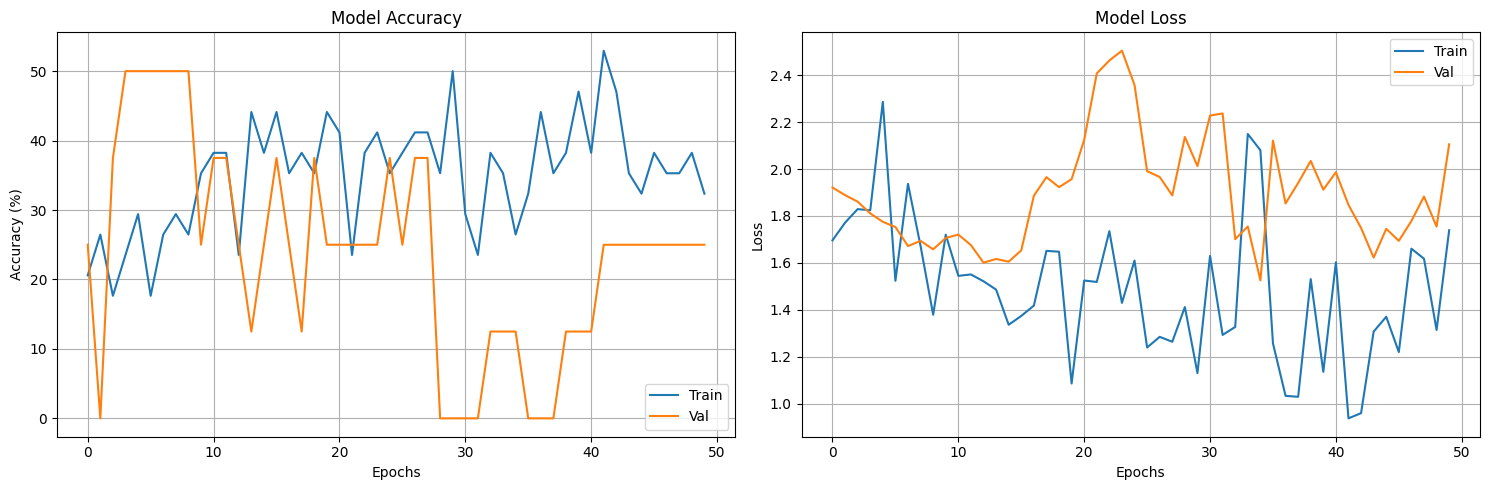

In [18]:
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# # Plotting training and validation accuracy
# ax[0].plot(train_accuracies)
# ax[0].plot(val_accuracies)
# ax[0].set_title('Model Accuracy')
# ax[0].set_xlabel('Epochs')
# ax[0].set_ylabel('Accuracy')
# ax[0].legend(['Train', 'Val'])

# # Plotting training and validation loss
# ax[1].plot(train_losses)
# ax[1].plot(val_losses)
# ax[1].set_title('Model Loss')
# ax[1].set_xlabel('Epochs')
# ax[1].set_ylabel('Loss')
# ax[1].legend(['Train', 'Val'])

# plt.show()

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy
ax[0].plot(train_accuracies, label='Train')
ax[0].plot(val_accuracies, label='Val')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy (%)')
ax[0].legend(loc='lower right')
ax[0].grid(True)

# Loss
ax[1].plot(train_losses, label='Train')
ax[1].plot(val_losses, label='Val')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='upper right')
ax[1].grid(True)

plt.tight_layout()
plt.show()


## D. Evaluating Your Trained Model

### Load Trained Model and Evaluate

In [19]:
# # Load the trained weights
# model.load_state_dict(torch.load('model_classification.pth'))

# # Set the model to evaluation mode
# model.eval()

# test_correct = 0
# test_total = 0

# with torch.no_grad():
#     for images, labels in val_loader:

#         images = images.cuda()
#         images = (images) / 255.

#         labels = labels.cuda()
#         labels = labels.long()

#         outputs = model(images)

#         predicted = outputs.argmax(-1)
#         print(predicted)
#         print(labels)
#         test_correct += (predicted == labels).sum().item()
#         test_total += labels.size(0)

# print(f'Test accuracy is {100. * test_correct / test_total}%')

# 載入模型與搬到 device（如果你還沒做過的話）
model.load_state_dict(torch.load('model_classification.pth', map_location=device))
model = model.to(device)
model.eval()

test_correct = 0
test_total = 0

with torch.no_grad():
    for images, labels in val_loader:
        images = (images / 255.).to(device)
        labels = labels.long().to(device)

        outputs = model(images)
        predicted = outputs.argmax(-1)

        # 顯示部分預測結果
        print("Predicted:", predicted.cpu().numpy())
        print("Ground Truth:", labels.cpu().numpy())

        test_correct += (predicted == labels).sum().item()
        test_total += labels.size(0)

print(f'Test accuracy is {100. * test_correct / test_total:.2f}%')


Predicted: [1 1 1 1 1 1 1 1]
Ground Truth: [0 0 1 1 2 2 3 3]
Test accuracy is 25.00%


Using device: cpu


  0%|          | 0/50 [00:00<?, ?it/s]


==== Epoch 1/50 ====


  2%|▏         | 1/50 [00:00<00:35,  1.38it/s]

Epoch 1/50, Train loss: 2.4471, Train acc: 8.82%, Val loss: 2.3108, Val acc: 37.50%, Best Val loss: 2.3108, Best Val acc: 37.50%

==== Epoch 2/50 ====


  4%|▍         | 2/50 [00:01<00:30,  1.56it/s]

Epoch 2/50, Train loss: 2.1013, Train acc: 41.18%, Val loss: 2.2179, Val acc: 25.00%, Best Val loss: 2.2179, Best Val acc: 37.50%

==== Epoch 3/50 ====


  6%|▌         | 3/50 [00:01<00:28,  1.63it/s]

Epoch 3/50, Train loss: 1.1550, Train acc: 52.94%, Val loss: 2.1504, Val acc: 25.00%, Best Val loss: 2.1504, Best Val acc: 37.50%

==== Epoch 4/50 ====


  8%|▊         | 4/50 [00:02<00:27,  1.68it/s]

Epoch 4/50, Train loss: 1.3262, Train acc: 52.94%, Val loss: 1.9024, Val acc: 25.00%, Best Val loss: 1.9024, Best Val acc: 37.50%

==== Epoch 5/50 ====


 10%|█         | 5/50 [00:03<00:26,  1.68it/s]

Epoch 5/50, Train loss: 2.0248, Train acc: 41.18%, Val loss: 1.6672, Val acc: 37.50%, Best Val loss: 1.6672, Best Val acc: 37.50%

==== Epoch 6/50 ====


 12%|█▏        | 6/50 [00:03<00:27,  1.61it/s]

Epoch 6/50, Train loss: 3.2739, Train acc: 35.29%, Val loss: 1.3582, Val acc: 75.00%, Best Val loss: 1.3582, Best Val acc: 75.00%

==== Epoch 7/50 ====


 14%|█▍        | 7/50 [00:04<00:26,  1.60it/s]

Epoch 7/50, Train loss: 2.0716, Train acc: 61.76%, Val loss: 1.1995, Val acc: 25.00%, Best Val loss: 1.1995, Best Val acc: 75.00%

==== Epoch 8/50 ====


 16%|█▌        | 8/50 [00:05<00:27,  1.55it/s]

Epoch 8/50, Train loss: 1.9919, Train acc: 58.82%, Val loss: 1.1365, Val acc: 25.00%, Best Val loss: 1.1365, Best Val acc: 75.00%

==== Epoch 9/50 ====


 18%|█▊        | 9/50 [00:05<00:26,  1.57it/s]

Epoch 9/50, Train loss: 1.4359, Train acc: 55.88%, Val loss: 1.2636, Val acc: 37.50%, Best Val loss: 1.1365, Best Val acc: 75.00%

==== Epoch 10/50 ====


 20%|██        | 10/50 [00:06<00:25,  1.59it/s]

Epoch 10/50, Train loss: 1.9401, Train acc: 47.06%, Val loss: 1.4660, Val acc: 37.50%, Best Val loss: 1.1365, Best Val acc: 75.00%

==== Epoch 11/50 ====


 22%|██▏       | 11/50 [00:06<00:24,  1.60it/s]

Epoch 11/50, Train loss: 1.8633, Train acc: 47.06%, Val loss: 1.4318, Val acc: 37.50%, Best Val loss: 1.1365, Best Val acc: 75.00%

==== Epoch 12/50 ====


 24%|██▍       | 12/50 [00:07<00:23,  1.63it/s]

Epoch 12/50, Train loss: 1.6160, Train acc: 29.41%, Val loss: 1.8733, Val acc: 25.00%, Best Val loss: 1.1365, Best Val acc: 75.00%

==== Epoch 13/50 ====


 26%|██▌       | 13/50 [00:08<00:22,  1.62it/s]

Epoch 13/50, Train loss: 1.8704, Train acc: 47.06%, Val loss: 1.3638, Val acc: 25.00%, Best Val loss: 1.1365, Best Val acc: 75.00%

==== Epoch 14/50 ====


 28%|██▊       | 14/50 [00:08<00:24,  1.47it/s]

Epoch 14/50, Train loss: 0.7384, Train acc: 61.76%, Val loss: 1.6408, Val acc: 12.50%, Best Val loss: 1.1365, Best Val acc: 75.00%

==== Epoch 15/50 ====


 30%|███       | 15/50 [00:09<00:24,  1.42it/s]

Epoch 15/50, Train loss: 2.0316, Train acc: 61.76%, Val loss: 2.0165, Val acc: 12.50%, Best Val loss: 1.1365, Best Val acc: 75.00%

==== Epoch 16/50 ====


 32%|███▏      | 16/50 [00:10<00:24,  1.38it/s]

Epoch 16/50, Train loss: 2.1441, Train acc: 47.06%, Val loss: 2.7117, Val acc: 37.50%, Best Val loss: 1.1365, Best Val acc: 75.00%

==== Epoch 17/50 ====


 34%|███▍      | 17/50 [00:11<00:24,  1.37it/s]

Epoch 17/50, Train loss: 1.1060, Train acc: 41.18%, Val loss: 3.1540, Val acc: 50.00%, Best Val loss: 1.1365, Best Val acc: 75.00%

==== Epoch 18/50 ====


 36%|███▌      | 18/50 [00:11<00:23,  1.34it/s]

Epoch 18/50, Train loss: 2.1099, Train acc: 55.88%, Val loss: 2.8606, Val acc: 50.00%, Best Val loss: 1.1365, Best Val acc: 75.00%

==== Epoch 19/50 ====


 38%|███▊      | 19/50 [00:12<00:23,  1.34it/s]

Epoch 19/50, Train loss: 0.9360, Train acc: 55.88%, Val loss: 2.8387, Val acc: 50.00%, Best Val loss: 1.1365, Best Val acc: 75.00%

==== Epoch 20/50 ====


 40%|████      | 20/50 [00:13<00:23,  1.29it/s]

Epoch 20/50, Train loss: 2.0548, Train acc: 58.82%, Val loss: 3.0332, Val acc: 75.00%, Best Val loss: 1.1365, Best Val acc: 75.00%

==== Epoch 21/50 ====


 42%|████▏     | 21/50 [00:14<00:22,  1.27it/s]

Epoch 21/50, Train loss: 1.4596, Train acc: 55.88%, Val loss: 3.4784, Val acc: 75.00%, Best Val loss: 1.1365, Best Val acc: 75.00%

==== Epoch 22/50 ====


 44%|████▍     | 22/50 [00:15<00:22,  1.25it/s]

Epoch 22/50, Train loss: 1.4616, Train acc: 76.47%, Val loss: 3.5948, Val acc: 50.00%, Best Val loss: 1.1365, Best Val acc: 75.00%

==== Epoch 23/50 ====


 46%|████▌     | 23/50 [00:16<00:22,  1.23it/s]

Epoch 23/50, Train loss: 1.3988, Train acc: 61.76%, Val loss: 3.2902, Val acc: 50.00%, Best Val loss: 1.1365, Best Val acc: 75.00%

==== Epoch 24/50 ====


 48%|████▊     | 24/50 [00:16<00:21,  1.23it/s]

Epoch 24/50, Train loss: 1.3830, Train acc: 52.94%, Val loss: 3.9583, Val acc: 50.00%, Best Val loss: 1.1365, Best Val acc: 75.00%

==== Epoch 25/50 ====


 50%|█████     | 25/50 [00:17<00:20,  1.24it/s]

Epoch 25/50, Train loss: 1.4131, Train acc: 61.76%, Val loss: 4.2570, Val acc: 75.00%, Best Val loss: 1.1365, Best Val acc: 75.00%

==== Epoch 26/50 ====


 52%|█████▏    | 26/50 [00:18<00:19,  1.23it/s]

Epoch 26/50, Train loss: 1.0562, Train acc: 61.76%, Val loss: 5.2272, Val acc: 75.00%, Best Val loss: 1.1365, Best Val acc: 75.00%

==== Epoch 27/50 ====


 54%|█████▍    | 27/50 [00:19<00:19,  1.20it/s]

Epoch 27/50, Train loss: 0.8425, Train acc: 73.53%, Val loss: 5.7512, Val acc: 75.00%, Best Val loss: 1.1365, Best Val acc: 75.00%

==== Epoch 28/50 ====


 56%|█████▌    | 28/50 [00:20<00:19,  1.13it/s]

Epoch 28/50, Train loss: 1.7624, Train acc: 64.71%, Val loss: 6.3759, Val acc: 75.00%, Best Val loss: 1.1365, Best Val acc: 75.00%

==== Epoch 29/50 ====


 58%|█████▊    | 29/50 [00:21<00:18,  1.15it/s]

Epoch 29/50, Train loss: 1.1522, Train acc: 76.47%, Val loss: 4.3061, Val acc: 75.00%, Best Val loss: 1.1365, Best Val acc: 75.00%

==== Epoch 30/50 ====


 60%|██████    | 30/50 [00:22<00:17,  1.14it/s]

Epoch 30/50, Train loss: 0.7965, Train acc: 79.41%, Val loss: 3.6493, Val acc: 75.00%, Best Val loss: 1.1365, Best Val acc: 75.00%

==== Epoch 31/50 ====


 62%|██████▏   | 31/50 [00:22<00:16,  1.14it/s]

Epoch 31/50, Train loss: 1.0200, Train acc: 73.53%, Val loss: 4.3782, Val acc: 50.00%, Best Val loss: 1.1365, Best Val acc: 75.00%

==== Epoch 32/50 ====


 64%|██████▍   | 32/50 [00:23<00:15,  1.17it/s]

Epoch 32/50, Train loss: 1.2525, Train acc: 61.76%, Val loss: 5.4353, Val acc: 37.50%, Best Val loss: 1.1365, Best Val acc: 75.00%

==== Epoch 33/50 ====


 66%|██████▌   | 33/50 [00:24<00:14,  1.21it/s]

Epoch 33/50, Train loss: 1.4298, Train acc: 67.65%, Val loss: 6.6788, Val acc: 50.00%, Best Val loss: 1.1365, Best Val acc: 75.00%

==== Epoch 34/50 ====


 68%|██████▊   | 34/50 [00:25<00:13,  1.18it/s]

Epoch 34/50, Train loss: 1.2295, Train acc: 67.65%, Val loss: 6.5491, Val acc: 62.50%, Best Val loss: 1.1365, Best Val acc: 75.00%

==== Epoch 35/50 ====


 70%|███████   | 35/50 [00:26<00:12,  1.16it/s]

Epoch 35/50, Train loss: 1.1764, Train acc: 76.47%, Val loss: 6.3605, Val acc: 75.00%, Best Val loss: 1.1365, Best Val acc: 75.00%

==== Epoch 36/50 ====


 72%|███████▏  | 36/50 [00:27<00:12,  1.14it/s]

Epoch 36/50, Train loss: 1.3091, Train acc: 70.59%, Val loss: 5.8321, Val acc: 75.00%, Best Val loss: 1.1365, Best Val acc: 75.00%

==== Epoch 37/50 ====


 74%|███████▍  | 37/50 [00:28<00:11,  1.12it/s]

Epoch 37/50, Train loss: 0.9610, Train acc: 73.53%, Val loss: 4.9107, Val acc: 75.00%, Best Val loss: 1.1365, Best Val acc: 75.00%

==== Epoch 38/50 ====


 76%|███████▌  | 38/50 [00:28<00:10,  1.16it/s]

Epoch 38/50, Train loss: 0.7873, Train acc: 76.47%, Val loss: 4.5729, Val acc: 62.50%, Best Val loss: 1.1365, Best Val acc: 75.00%

==== Epoch 39/50 ====


 78%|███████▊  | 39/50 [00:29<00:09,  1.19it/s]

Epoch 39/50, Train loss: 1.4971, Train acc: 50.00%, Val loss: 3.8585, Val acc: 62.50%, Best Val loss: 1.1365, Best Val acc: 75.00%

==== Epoch 40/50 ====


 80%|████████  | 40/50 [00:30<00:08,  1.15it/s]

Epoch 40/50, Train loss: 1.1354, Train acc: 67.65%, Val loss: 3.5010, Val acc: 75.00%, Best Val loss: 1.1365, Best Val acc: 75.00%

==== Epoch 41/50 ====


 82%|████████▏ | 41/50 [00:31<00:07,  1.15it/s]

Epoch 41/50, Train loss: 1.5936, Train acc: 38.24%, Val loss: 3.5049, Val acc: 75.00%, Best Val loss: 1.1365, Best Val acc: 75.00%

==== Epoch 42/50 ====


 84%|████████▍ | 42/50 [00:32<00:06,  1.14it/s]

Epoch 42/50, Train loss: 1.5116, Train acc: 61.76%, Val loss: 4.0394, Val acc: 75.00%, Best Val loss: 1.1365, Best Val acc: 75.00%

==== Epoch 43/50 ====


 86%|████████▌ | 43/50 [00:33<00:06,  1.12it/s]

Epoch 43/50, Train loss: 0.9406, Train acc: 73.53%, Val loss: 5.4383, Val acc: 62.50%, Best Val loss: 1.1365, Best Val acc: 75.00%

==== Epoch 44/50 ====


 88%|████████▊ | 44/50 [00:34<00:05,  1.15it/s]

Epoch 44/50, Train loss: 0.7063, Train acc: 76.47%, Val loss: 4.5264, Val acc: 62.50%, Best Val loss: 1.1365, Best Val acc: 75.00%

==== Epoch 45/50 ====


 90%|█████████ | 45/50 [00:35<00:04,  1.17it/s]

Epoch 45/50, Train loss: 1.6101, Train acc: 67.65%, Val loss: 4.0971, Val acc: 75.00%, Best Val loss: 1.1365, Best Val acc: 75.00%

==== Epoch 46/50 ====


 92%|█████████▏| 46/50 [00:35<00:03,  1.21it/s]

Epoch 46/50, Train loss: 1.0170, Train acc: 70.59%, Val loss: 4.8097, Val acc: 75.00%, Best Val loss: 1.1365, Best Val acc: 75.00%

==== Epoch 47/50 ====


 94%|█████████▍| 47/50 [00:36<00:02,  1.20it/s]

Epoch 47/50, Train loss: 0.9983, Train acc: 70.59%, Val loss: 3.9402, Val acc: 75.00%, Best Val loss: 1.1365, Best Val acc: 75.00%

==== Epoch 48/50 ====


 96%|█████████▌| 48/50 [00:37<00:01,  1.24it/s]

Epoch 48/50, Train loss: 1.3662, Train acc: 64.71%, Val loss: 2.5682, Val acc: 75.00%, Best Val loss: 1.1365, Best Val acc: 75.00%

==== Epoch 49/50 ====


 98%|█████████▊| 49/50 [00:38<00:00,  1.19it/s]

Epoch 49/50, Train loss: 1.2310, Train acc: 70.59%, Val loss: 2.8503, Val acc: 50.00%, Best Val loss: 1.1365, Best Val acc: 75.00%

==== Epoch 50/50 ====


100%|██████████| 50/50 [00:39<00:00,  1.28it/s]

Epoch 50/50, Train loss: 0.6593, Train acc: 76.47%, Val loss: 3.1950, Val acc: 50.00%, Best Val loss: 1.1365, Best Val acc: 75.00%
Predicted: [0 0 1 1 3 0 3 3]
Ground Truth: [0 0 1 1 2 2 3 3]
Test accuracy is 75.00%


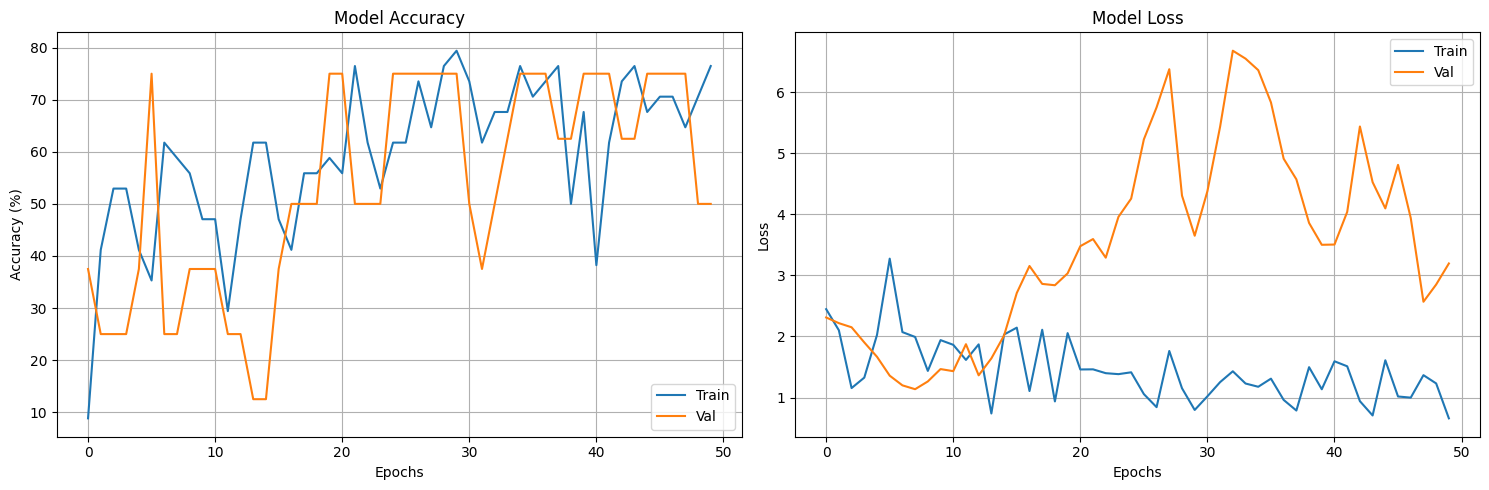

In [25]:
# 方法一：解凍部分預訓練權重 (Fine-tuning)
# 修改： 解凍 ResNet18 的後幾層（例如 layer4），不只訓練最後一層。
# 優點： 可以學習更多與你資料集相關的特徵。
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models

model = models.resnet18(weights='IMAGENET1K_V1')

#修改部分
for name, param in model.named_parameters():
    if 'layer4' in name or 'fc' in name:
        param.requires_grad = True
    else:
        param.requires_grad = False


num_ftrs = model.fc.in_features
num_class = 8

# change # of class from 1000 into 8 in the last layer
model.fc = nn.Linear(num_ftrs, num_class)
#print(model)

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR, StepLR
from tqdm.auto import tqdm

# 自動選擇 device：GPU 有的話就用，沒有就 fallback 到 CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

epochs = 50
model = model.to(device)  # 把模型搬到指定設備上

best_val_loss = float('inf')
best_val_acc = -1

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
lr_scheduler = CosineAnnealingLR(optimizer, T_max=len(train_loader)*epochs, eta_min=0)

for epoch in tqdm(range(epochs)):
    print(f"\n==== Epoch {epoch+1}/{epochs} ====")

    # Training
    model.train()
    total_loss = 0.0
    train_correct = 0
    total_train_samples = 0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.long().to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        train_predicted = outputs.argmax(-1)
        train_correct += (train_predicted == labels).sum().item()
        total_train_samples += labels.size(0)

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = 100. * train_correct / total_train_samples

    # Validation
    model.eval()
    total_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.long().to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

            predicted = outputs.argmax(-1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = total_val_loss / len(val_loader)
    val_accuracy = 100. * correct / total

    lr_scheduler.step()

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss

    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        torch.save(model.state_dict(), 'model_classification.pth')

    print(f'Epoch {epoch+1}/{epochs}, Train loss: {avg_train_loss:.4f}, Train acc: {train_accuracy:.2f}%, Val loss: {avg_val_loss:.4f}, Val acc: {val_accuracy:.2f}%, Best Val loss: {best_val_loss:.4f}, Best Val acc: {best_val_acc:.2f}%')

    # 儲存每一輪的表現
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

model.load_state_dict(torch.load('model_classification.pth', map_location=device))
model = model.to(device)
model.eval()

test_correct = 0
test_total = 0

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.long().to(device)

        outputs = model(images)
        predicted = outputs.argmax(-1)

        # 顯示部分預測結果
        print("Predicted:", predicted.cpu().numpy())
        print("Ground Truth:", labels.cpu().numpy())

        test_correct += (predicted == labels).sum().item()
        test_total += labels.size(0)

print(f'Test accuracy is {100. * test_correct / test_total:.2f}%')

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy
ax[0].plot(train_accuracies, label='Train')
ax[0].plot(val_accuracies, label='Val')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy (%)')
ax[0].legend(loc='lower right')
ax[0].grid(True)

# Loss
ax[1].plot(train_losses, label='Train')
ax[1].plot(val_losses, label='Val')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='upper right')
ax[1].grid(True)

plt.tight_layout()
plt.show()



Using device: cpu


  0%|          | 0/50 [00:00<?, ?it/s]


==== Epoch 1/50 ====


  2%|▏         | 1/50 [00:00<00:23,  2.09it/s]

Epoch 1/50, Train loss: 2.1191, Train acc: 5.88%, Val loss: 1.8892, Val acc: 25.00%, Best Val loss: 1.8892, Best Val acc: 25.00%

==== Epoch 2/50 ====


  4%|▍         | 2/50 [00:01<00:24,  1.96it/s]

Epoch 2/50, Train loss: 3.2453, Train acc: 23.53%, Val loss: 1.6966, Val acc: 37.50%, Best Val loss: 1.6966, Best Val acc: 37.50%

==== Epoch 3/50 ====


  6%|▌         | 3/50 [00:01<00:22,  2.07it/s]

Epoch 3/50, Train loss: 3.3595, Train acc: 23.53%, Val loss: 2.2195, Val acc: 25.00%, Best Val loss: 1.6966, Best Val acc: 37.50%

==== Epoch 4/50 ====


  8%|▊         | 4/50 [00:01<00:21,  2.17it/s]

Epoch 4/50, Train loss: 9.0845, Train acc: 23.53%, Val loss: 1.8688, Val acc: 25.00%, Best Val loss: 1.6966, Best Val acc: 37.50%

==== Epoch 5/50 ====


 10%|█         | 5/50 [00:02<00:19,  2.33it/s]

Epoch 5/50, Train loss: 5.7600, Train acc: 23.53%, Val loss: 1.7159, Val acc: 25.00%, Best Val loss: 1.6966, Best Val acc: 37.50%

==== Epoch 6/50 ====


 12%|█▏        | 6/50 [00:02<00:18,  2.35it/s]

Epoch 6/50, Train loss: 2.8845, Train acc: 23.53%, Val loss: 3.7218, Val acc: 25.00%, Best Val loss: 1.6966, Best Val acc: 37.50%

==== Epoch 7/50 ====


 14%|█▍        | 7/50 [00:03<00:17,  2.41it/s]

Epoch 7/50, Train loss: 11.0728, Train acc: 23.53%, Val loss: 5.2576, Val acc: 25.00%, Best Val loss: 1.6966, Best Val acc: 37.50%

==== Epoch 8/50 ====


 16%|█▌        | 8/50 [00:03<00:18,  2.29it/s]

Epoch 8/50, Train loss: 8.7701, Train acc: 23.53%, Val loss: 3.8974, Val acc: 25.00%, Best Val loss: 1.6966, Best Val acc: 37.50%

==== Epoch 9/50 ====


 18%|█▊        | 9/50 [00:04<00:18,  2.23it/s]

Epoch 9/50, Train loss: 11.1624, Train acc: 20.59%, Val loss: 3.1257, Val acc: 25.00%, Best Val loss: 1.6966, Best Val acc: 37.50%

==== Epoch 10/50 ====


 20%|██        | 10/50 [00:04<00:17,  2.26it/s]

Epoch 10/50, Train loss: 2.6156, Train acc: 41.18%, Val loss: 4.3887, Val acc: 12.50%, Best Val loss: 1.6966, Best Val acc: 37.50%

==== Epoch 11/50 ====


 22%|██▏       | 11/50 [00:04<00:16,  2.32it/s]

Epoch 11/50, Train loss: 15.0144, Train acc: 47.06%, Val loss: 8.1904, Val acc: 25.00%, Best Val loss: 1.6966, Best Val acc: 37.50%

==== Epoch 12/50 ====


 24%|██▍       | 12/50 [00:05<00:16,  2.35it/s]

Epoch 12/50, Train loss: 9.2301, Train acc: 23.53%, Val loss: 7.5151, Val acc: 25.00%, Best Val loss: 1.6966, Best Val acc: 37.50%

==== Epoch 13/50 ====


 26%|██▌       | 13/50 [00:05<00:16,  2.31it/s]

Epoch 13/50, Train loss: 4.7440, Train acc: 32.35%, Val loss: 8.0635, Val acc: 25.00%, Best Val loss: 1.6966, Best Val acc: 37.50%

==== Epoch 14/50 ====


 28%|██▊       | 14/50 [00:06<00:15,  2.28it/s]

Epoch 14/50, Train loss: 7.3519, Train acc: 26.47%, Val loss: 8.7496, Val acc: 25.00%, Best Val loss: 1.6966, Best Val acc: 37.50%

==== Epoch 15/50 ====


 30%|███       | 15/50 [00:06<00:15,  2.26it/s]

Epoch 15/50, Train loss: 7.6511, Train acc: 32.35%, Val loss: 10.6350, Val acc: 25.00%, Best Val loss: 1.6966, Best Val acc: 37.50%

==== Epoch 16/50 ====


 32%|███▏      | 16/50 [00:07<00:14,  2.29it/s]

Epoch 16/50, Train loss: 6.4042, Train acc: 26.47%, Val loss: 10.3687, Val acc: 25.00%, Best Val loss: 1.6966, Best Val acc: 37.50%

==== Epoch 17/50 ====


 34%|███▍      | 17/50 [00:07<00:14,  2.30it/s]

Epoch 17/50, Train loss: 3.6934, Train acc: 32.35%, Val loss: 7.5005, Val acc: 25.00%, Best Val loss: 1.6966, Best Val acc: 37.50%

==== Epoch 18/50 ====


 36%|███▌      | 18/50 [00:07<00:13,  2.33it/s]

Epoch 18/50, Train loss: 9.8131, Train acc: 41.18%, Val loss: 6.2954, Val acc: 25.00%, Best Val loss: 1.6966, Best Val acc: 37.50%

==== Epoch 19/50 ====


 38%|███▊      | 19/50 [00:08<00:13,  2.33it/s]

Epoch 19/50, Train loss: 6.4077, Train acc: 32.35%, Val loss: 7.1475, Val acc: 12.50%, Best Val loss: 1.6966, Best Val acc: 37.50%

==== Epoch 20/50 ====


 40%|████      | 20/50 [00:08<00:13,  2.29it/s]

Epoch 20/50, Train loss: 7.4906, Train acc: 41.18%, Val loss: 10.8539, Val acc: 12.50%, Best Val loss: 1.6966, Best Val acc: 37.50%

==== Epoch 21/50 ====


 42%|████▏     | 21/50 [00:09<00:12,  2.27it/s]

Epoch 21/50, Train loss: 8.1469, Train acc: 44.12%, Val loss: 12.5783, Val acc: 25.00%, Best Val loss: 1.6966, Best Val acc: 37.50%

==== Epoch 22/50 ====


 44%|████▍     | 22/50 [00:09<00:12,  2.25it/s]

Epoch 22/50, Train loss: 3.7783, Train acc: 47.06%, Val loss: 14.3462, Val acc: 25.00%, Best Val loss: 1.6966, Best Val acc: 37.50%

==== Epoch 23/50 ====


 46%|████▌     | 23/50 [00:10<00:12,  2.24it/s]

Epoch 23/50, Train loss: 6.9449, Train acc: 35.29%, Val loss: 10.3805, Val acc: 37.50%, Best Val loss: 1.6966, Best Val acc: 37.50%

==== Epoch 24/50 ====


 48%|████▊     | 24/50 [00:10<00:12,  2.08it/s]

Epoch 24/50, Train loss: 2.3363, Train acc: 47.06%, Val loss: 8.1004, Val acc: 50.00%, Best Val loss: 1.6966, Best Val acc: 50.00%

==== Epoch 25/50 ====


 50%|█████     | 25/50 [00:11<00:12,  2.08it/s]

Epoch 25/50, Train loss: 6.8147, Train acc: 41.18%, Val loss: 7.8755, Val acc: 50.00%, Best Val loss: 1.6966, Best Val acc: 50.00%

==== Epoch 26/50 ====


 52%|█████▏    | 26/50 [00:11<00:11,  2.15it/s]

Epoch 26/50, Train loss: 11.9322, Train acc: 41.18%, Val loss: 8.8158, Val acc: 37.50%, Best Val loss: 1.6966, Best Val acc: 50.00%

==== Epoch 27/50 ====


 54%|█████▍    | 27/50 [00:12<00:10,  2.12it/s]

Epoch 27/50, Train loss: 8.8850, Train acc: 35.29%, Val loss: 6.0753, Val acc: 25.00%, Best Val loss: 1.6966, Best Val acc: 50.00%

==== Epoch 28/50 ====


 56%|█████▌    | 28/50 [00:12<00:10,  2.12it/s]

Epoch 28/50, Train loss: 5.4985, Train acc: 38.24%, Val loss: 12.7332, Val acc: 25.00%, Best Val loss: 1.6966, Best Val acc: 50.00%

==== Epoch 29/50 ====


 58%|█████▊    | 29/50 [00:13<00:09,  2.13it/s]

Epoch 29/50, Train loss: 5.0152, Train acc: 44.12%, Val loss: 23.7239, Val acc: 25.00%, Best Val loss: 1.6966, Best Val acc: 50.00%

==== Epoch 30/50 ====


 60%|██████    | 30/50 [00:13<00:09,  2.17it/s]

Epoch 30/50, Train loss: 19.3520, Train acc: 35.29%, Val loss: 31.0194, Val acc: 25.00%, Best Val loss: 1.6966, Best Val acc: 50.00%

==== Epoch 31/50 ====


 62%|██████▏   | 31/50 [00:13<00:08,  2.20it/s]

Epoch 31/50, Train loss: 11.5785, Train acc: 23.53%, Val loss: 25.8536, Val acc: 25.00%, Best Val loss: 1.6966, Best Val acc: 50.00%

==== Epoch 32/50 ====


 64%|██████▍   | 32/50 [00:14<00:08,  2.17it/s]

Epoch 32/50, Train loss: 8.1383, Train acc: 20.59%, Val loss: 11.4746, Val acc: 25.00%, Best Val loss: 1.6966, Best Val acc: 50.00%

==== Epoch 33/50 ====


 66%|██████▌   | 33/50 [00:14<00:07,  2.24it/s]

Epoch 33/50, Train loss: 4.7435, Train acc: 32.35%, Val loss: 9.8086, Val acc: 0.00%, Best Val loss: 1.6966, Best Val acc: 50.00%

==== Epoch 34/50 ====


 68%|██████▊   | 34/50 [00:15<00:06,  2.29it/s]

Epoch 34/50, Train loss: 4.4493, Train acc: 32.35%, Val loss: 11.6097, Val acc: 12.50%, Best Val loss: 1.6966, Best Val acc: 50.00%

==== Epoch 35/50 ====


 70%|███████   | 35/50 [00:15<00:06,  2.27it/s]

Epoch 35/50, Train loss: 7.6366, Train acc: 41.18%, Val loss: 12.4410, Val acc: 0.00%, Best Val loss: 1.6966, Best Val acc: 50.00%

==== Epoch 36/50 ====


 72%|███████▏  | 36/50 [00:16<00:06,  2.18it/s]

Epoch 36/50, Train loss: 3.8974, Train acc: 38.24%, Val loss: 10.9755, Val acc: 12.50%, Best Val loss: 1.6966, Best Val acc: 50.00%

==== Epoch 37/50 ====


 74%|███████▍  | 37/50 [00:16<00:05,  2.21it/s]

Epoch 37/50, Train loss: 5.3718, Train acc: 26.47%, Val loss: 8.8323, Val acc: 25.00%, Best Val loss: 1.6966, Best Val acc: 50.00%

==== Epoch 38/50 ====


 76%|███████▌  | 38/50 [00:17<00:05,  2.24it/s]

Epoch 38/50, Train loss: 15.1464, Train acc: 47.06%, Val loss: 4.8457, Val acc: 25.00%, Best Val loss: 1.6966, Best Val acc: 50.00%

==== Epoch 39/50 ====


 78%|███████▊  | 39/50 [00:17<00:04,  2.27it/s]

Epoch 39/50, Train loss: 5.5559, Train acc: 35.29%, Val loss: 8.2971, Val acc: 25.00%, Best Val loss: 1.6966, Best Val acc: 50.00%

==== Epoch 40/50 ====


 80%|████████  | 40/50 [00:17<00:04,  2.25it/s]

Epoch 40/50, Train loss: 6.2409, Train acc: 35.29%, Val loss: 17.1919, Val acc: 25.00%, Best Val loss: 1.6966, Best Val acc: 50.00%

==== Epoch 41/50 ====


 82%|████████▏ | 41/50 [00:18<00:03,  2.26it/s]

Epoch 41/50, Train loss: 3.5355, Train acc: 38.24%, Val loss: 21.8293, Val acc: 25.00%, Best Val loss: 1.6966, Best Val acc: 50.00%

==== Epoch 42/50 ====


 84%|████████▍ | 42/50 [00:18<00:03,  2.25it/s]

Epoch 42/50, Train loss: 4.1091, Train acc: 41.18%, Val loss: 20.1220, Val acc: 25.00%, Best Val loss: 1.6966, Best Val acc: 50.00%

==== Epoch 43/50 ====


 86%|████████▌ | 43/50 [00:19<00:03,  2.18it/s]

Epoch 43/50, Train loss: 9.0207, Train acc: 35.29%, Val loss: 16.4220, Val acc: 25.00%, Best Val loss: 1.6966, Best Val acc: 50.00%

==== Epoch 44/50 ====


 88%|████████▊ | 44/50 [00:19<00:02,  2.17it/s]

Epoch 44/50, Train loss: 5.6935, Train acc: 29.41%, Val loss: 15.1581, Val acc: 12.50%, Best Val loss: 1.6966, Best Val acc: 50.00%

==== Epoch 45/50 ====


 90%|█████████ | 45/50 [00:20<00:02,  2.22it/s]

Epoch 45/50, Train loss: 6.4849, Train acc: 23.53%, Val loss: 14.7204, Val acc: 25.00%, Best Val loss: 1.6966, Best Val acc: 50.00%

==== Epoch 46/50 ====


 92%|█████████▏| 46/50 [00:20<00:01,  2.23it/s]

Epoch 46/50, Train loss: 3.1361, Train acc: 44.12%, Val loss: 11.4278, Val acc: 25.00%, Best Val loss: 1.6966, Best Val acc: 50.00%

==== Epoch 47/50 ====


 94%|█████████▍| 47/50 [00:21<00:01,  2.29it/s]

Epoch 47/50, Train loss: 2.8402, Train acc: 52.94%, Val loss: 10.1717, Val acc: 50.00%, Best Val loss: 1.6966, Best Val acc: 50.00%

==== Epoch 48/50 ====


 96%|█████████▌| 48/50 [00:21<00:00,  2.33it/s]

Epoch 48/50, Train loss: 4.8236, Train acc: 41.18%, Val loss: 11.4044, Val acc: 25.00%, Best Val loss: 1.6966, Best Val acc: 50.00%

==== Epoch 49/50 ====


 98%|█████████▊| 49/50 [00:21<00:00,  2.28it/s]

Epoch 49/50, Train loss: 6.1416, Train acc: 67.65%, Val loss: 7.0250, Val acc: 12.50%, Best Val loss: 1.6966, Best Val acc: 50.00%

==== Epoch 50/50 ====


100%|██████████| 50/50 [00:22<00:00,  2.24it/s]

Epoch 50/50, Train loss: 11.2389, Train acc: 44.12%, Val loss: 3.8500, Val acc: 50.00%, Best Val loss: 1.6966, Best Val acc: 50.00%
Predicted: [1 1 1 1 2 2 2 2]
Ground Truth: [0 0 1 1 2 2 3 3]
Test accuracy is 50.00%


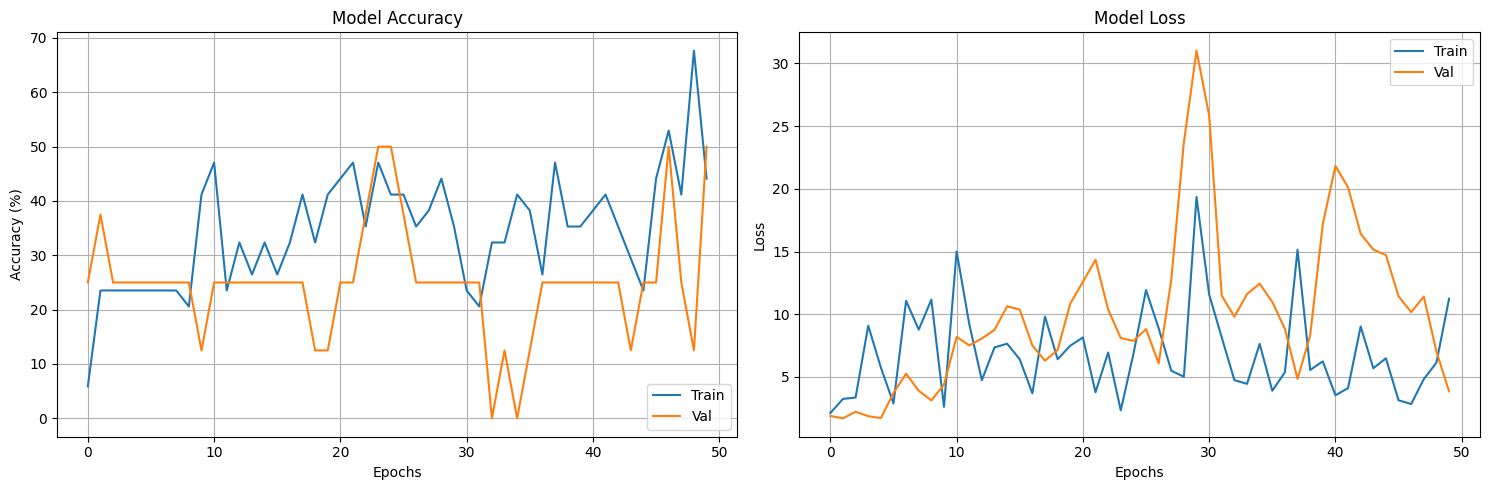

In [26]:
# 方法二：改用不同 Optimizer（例如 SGD + Momentum）
# 修改： 把 Adam 換成 SGD，並搭配 momentum（例如 momentum=0.9）。
# 理由： SGD 常被認為泛化能力較好，有時比 Adam 表現更穩。
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models

model = models.resnet18(weights='IMAGENET1K_V1')

for param in model.parameters():
    param.requires_grad = False



num_ftrs = model.fc.in_features
num_class = 8

# change # of class from 1000 into 8 in the last layer
model.fc = nn.Linear(num_ftrs, num_class)
#print(model)

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR, StepLR
from tqdm.auto import tqdm

# 自動選擇 device：GPU 有的話就用，沒有就 fallback 到 CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

epochs = 50
model = model.to(device)  # 把模型搬到指定設備上

best_val_loss = float('inf')
best_val_acc = -1

criterion = nn.CrossEntropyLoss()
#修改這裡
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
lr_scheduler = CosineAnnealingLR(optimizer, T_max=len(train_loader)*epochs, eta_min=0)

for epoch in tqdm(range(epochs)):
    print(f"\n==== Epoch {epoch+1}/{epochs} ====")

    # Training
    model.train()
    total_loss = 0.0
    train_correct = 0
    total_train_samples = 0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.long().to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        train_predicted = outputs.argmax(-1)
        train_correct += (train_predicted == labels).sum().item()
        total_train_samples += labels.size(0)

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = 100. * train_correct / total_train_samples

    # Validation
    model.eval()
    total_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.long().to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

            predicted = outputs.argmax(-1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = total_val_loss / len(val_loader)
    val_accuracy = 100. * correct / total

    lr_scheduler.step()

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss

    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        torch.save(model.state_dict(), 'model_classification.pth')

    print(f'Epoch {epoch+1}/{epochs}, Train loss: {avg_train_loss:.4f}, Train acc: {train_accuracy:.2f}%, Val loss: {avg_val_loss:.4f}, Val acc: {val_accuracy:.2f}%, Best Val loss: {best_val_loss:.4f}, Best Val acc: {best_val_acc:.2f}%')

    # 儲存每一輪的表現
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

model.load_state_dict(torch.load('model_classification.pth', map_location=device))
model = model.to(device)
model.eval()

test_correct = 0
test_total = 0

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.long().to(device)

        outputs = model(images)
        predicted = outputs.argmax(-1)

        # 顯示部分預測結果
        print("Predicted:", predicted.cpu().numpy())
        print("Ground Truth:", labels.cpu().numpy())

        test_correct += (predicted == labels).sum().item()
        test_total += labels.size(0)

print(f'Test accuracy is {100. * test_correct / test_total:.2f}%')


import matplotlib.pyplot as plt 

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy
ax[0].plot(train_accuracies, label='Train')
ax[0].plot(val_accuracies, label='Val')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy (%)')
ax[0].legend(loc='lower right')
ax[0].grid(True)

# Loss
ax[1].plot(train_losses, label='Train')
ax[1].plot(val_losses, label='Val')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='upper right')
ax[1].grid(True)

plt.tight_layout()
plt.show()



Using device: cpu


  0%|          | 0/50 [00:00<?, ?it/s]


==== Epoch 1/50 ====


  2%|▏         | 1/50 [00:00<00:23,  2.10it/s]

Epoch 1/50, Train loss: 2.1543, Train acc: 8.82%, Val loss: 1.9802, Val acc: 0.00%, Best Val loss: 1.9802, Best Val acc: 0.00%

==== Epoch 2/50 ====


  4%|▍         | 2/50 [00:01<00:24,  1.95it/s]

Epoch 2/50, Train loss: 1.9094, Train acc: 20.59%, Val loss: 1.8878, Val acc: 12.50%, Best Val loss: 1.8878, Best Val acc: 12.50%

==== Epoch 3/50 ====


  6%|▌         | 3/50 [00:01<00:23,  2.01it/s]

Epoch 3/50, Train loss: 2.2085, Train acc: 17.65%, Val loss: 1.8864, Val acc: 0.00%, Best Val loss: 1.8864, Best Val acc: 12.50%

==== Epoch 4/50 ====


  8%|▊         | 4/50 [00:01<00:22,  2.04it/s]

Epoch 4/50, Train loss: 1.6240, Train acc: 17.65%, Val loss: 1.8568, Val acc: 0.00%, Best Val loss: 1.8568, Best Val acc: 12.50%

==== Epoch 5/50 ====


 10%|█         | 5/50 [00:02<00:22,  2.03it/s]

Epoch 5/50, Train loss: 1.5994, Train acc: 23.53%, Val loss: 1.8405, Val acc: 25.00%, Best Val loss: 1.8405, Best Val acc: 25.00%

==== Epoch 6/50 ====


 12%|█▏        | 6/50 [00:02<00:21,  2.07it/s]

Epoch 6/50, Train loss: 2.0266, Train acc: 17.65%, Val loss: 1.7876, Val acc: 25.00%, Best Val loss: 1.7876, Best Val acc: 25.00%

==== Epoch 7/50 ====


 14%|█▍        | 7/50 [00:03<00:20,  2.13it/s]

Epoch 7/50, Train loss: 1.6170, Train acc: 38.24%, Val loss: 1.8109, Val acc: 25.00%, Best Val loss: 1.7876, Best Val acc: 25.00%

==== Epoch 8/50 ====


 16%|█▌        | 8/50 [00:03<00:19,  2.15it/s]

Epoch 8/50, Train loss: 1.8734, Train acc: 11.76%, Val loss: 1.7559, Val acc: 25.00%, Best Val loss: 1.7559, Best Val acc: 25.00%

==== Epoch 9/50 ====


 18%|█▊        | 9/50 [00:04<00:18,  2.27it/s]

Epoch 9/50, Train loss: 1.6592, Train acc: 23.53%, Val loss: 1.7643, Val acc: 25.00%, Best Val loss: 1.7559, Best Val acc: 25.00%

==== Epoch 10/50 ====


 20%|██        | 10/50 [00:04<00:18,  2.22it/s]

Epoch 10/50, Train loss: 1.6396, Train acc: 32.35%, Val loss: 1.7939, Val acc: 25.00%, Best Val loss: 1.7559, Best Val acc: 25.00%

==== Epoch 11/50 ====


 22%|██▏       | 11/50 [00:05<00:18,  2.12it/s]

Epoch 11/50, Train loss: 1.7365, Train acc: 41.18%, Val loss: 1.8403, Val acc: 25.00%, Best Val loss: 1.7559, Best Val acc: 25.00%

==== Epoch 12/50 ====


 24%|██▍       | 12/50 [00:05<00:17,  2.15it/s]

Epoch 12/50, Train loss: 2.1467, Train acc: 20.59%, Val loss: 1.8620, Val acc: 25.00%, Best Val loss: 1.7559, Best Val acc: 25.00%

==== Epoch 13/50 ====


 26%|██▌       | 13/50 [00:06<00:17,  2.15it/s]

Epoch 13/50, Train loss: 1.4771, Train acc: 26.47%, Val loss: 1.8490, Val acc: 25.00%, Best Val loss: 1.7559, Best Val acc: 25.00%

==== Epoch 14/50 ====


 28%|██▊       | 14/50 [00:06<00:17,  2.11it/s]

Epoch 14/50, Train loss: 1.4121, Train acc: 38.24%, Val loss: 1.7590, Val acc: 50.00%, Best Val loss: 1.7559, Best Val acc: 50.00%

==== Epoch 15/50 ====


 30%|███       | 15/50 [00:07<00:16,  2.06it/s]

Epoch 15/50, Train loss: 1.6806, Train acc: 20.59%, Val loss: 1.7433, Val acc: 25.00%, Best Val loss: 1.7433, Best Val acc: 50.00%

==== Epoch 16/50 ====


 32%|███▏      | 16/50 [00:07<00:18,  1.85it/s]

Epoch 16/50, Train loss: 1.5431, Train acc: 29.41%, Val loss: 1.9123, Val acc: 25.00%, Best Val loss: 1.7433, Best Val acc: 50.00%

==== Epoch 17/50 ====


 34%|███▍      | 17/50 [00:08<00:18,  1.83it/s]

Epoch 17/50, Train loss: 1.6642, Train acc: 11.76%, Val loss: 1.9361, Val acc: 25.00%, Best Val loss: 1.7433, Best Val acc: 50.00%

==== Epoch 18/50 ====


 36%|███▌      | 18/50 [00:08<00:17,  1.85it/s]

Epoch 18/50, Train loss: 2.0355, Train acc: 32.35%, Val loss: 1.9723, Val acc: 25.00%, Best Val loss: 1.7433, Best Val acc: 50.00%

==== Epoch 19/50 ====


 38%|███▊      | 19/50 [00:09<00:16,  1.89it/s]

Epoch 19/50, Train loss: 1.7675, Train acc: 26.47%, Val loss: 1.8699, Val acc: 25.00%, Best Val loss: 1.7433, Best Val acc: 50.00%

==== Epoch 20/50 ====


 40%|████      | 20/50 [00:09<00:16,  1.85it/s]

Epoch 20/50, Train loss: 1.3766, Train acc: 35.29%, Val loss: 1.8636, Val acc: 25.00%, Best Val loss: 1.7433, Best Val acc: 50.00%

==== Epoch 21/50 ====


 42%|████▏     | 21/50 [00:10<00:15,  1.82it/s]

Epoch 21/50, Train loss: 2.2534, Train acc: 32.35%, Val loss: 1.6388, Val acc: 25.00%, Best Val loss: 1.6388, Best Val acc: 50.00%

==== Epoch 22/50 ====


 44%|████▍     | 22/50 [00:11<00:15,  1.83it/s]

Epoch 22/50, Train loss: 1.7939, Train acc: 23.53%, Val loss: 1.5706, Val acc: 12.50%, Best Val loss: 1.5706, Best Val acc: 50.00%

==== Epoch 23/50 ====


 46%|████▌     | 23/50 [00:11<00:14,  1.80it/s]

Epoch 23/50, Train loss: 1.4780, Train acc: 32.35%, Val loss: 1.6710, Val acc: 25.00%, Best Val loss: 1.5706, Best Val acc: 50.00%

==== Epoch 24/50 ====


 48%|████▊     | 24/50 [00:12<00:15,  1.73it/s]

Epoch 24/50, Train loss: 1.5346, Train acc: 20.59%, Val loss: 1.5481, Val acc: 25.00%, Best Val loss: 1.5481, Best Val acc: 50.00%

==== Epoch 25/50 ====


 50%|█████     | 25/50 [00:12<00:14,  1.70it/s]

Epoch 25/50, Train loss: 1.2977, Train acc: 41.18%, Val loss: 1.6433, Val acc: 25.00%, Best Val loss: 1.5481, Best Val acc: 50.00%

==== Epoch 26/50 ====


 52%|█████▏    | 26/50 [00:13<00:13,  1.72it/s]

Epoch 26/50, Train loss: 1.2819, Train acc: 35.29%, Val loss: 1.6690, Val acc: 37.50%, Best Val loss: 1.5481, Best Val acc: 50.00%

==== Epoch 27/50 ====


 54%|█████▍    | 27/50 [00:14<00:13,  1.72it/s]

Epoch 27/50, Train loss: 1.5618, Train acc: 35.29%, Val loss: 1.8275, Val acc: 37.50%, Best Val loss: 1.5481, Best Val acc: 50.00%

==== Epoch 28/50 ====


 56%|█████▌    | 28/50 [00:14<00:12,  1.72it/s]

Epoch 28/50, Train loss: 2.0415, Train acc: 29.41%, Val loss: 1.7385, Val acc: 37.50%, Best Val loss: 1.5481, Best Val acc: 50.00%

==== Epoch 29/50 ====


 58%|█████▊    | 29/50 [00:15<00:11,  1.75it/s]

Epoch 29/50, Train loss: 1.1645, Train acc: 41.18%, Val loss: 1.5473, Val acc: 37.50%, Best Val loss: 1.5473, Best Val acc: 50.00%

==== Epoch 30/50 ====


 60%|██████    | 30/50 [00:15<00:11,  1.73it/s]

Epoch 30/50, Train loss: 1.4005, Train acc: 29.41%, Val loss: 1.8281, Val acc: 50.00%, Best Val loss: 1.5473, Best Val acc: 50.00%

==== Epoch 31/50 ====


 62%|██████▏   | 31/50 [00:16<00:11,  1.62it/s]

Epoch 31/50, Train loss: 1.3210, Train acc: 32.35%, Val loss: 1.6015, Val acc: 50.00%, Best Val loss: 1.5473, Best Val acc: 50.00%

==== Epoch 32/50 ====


 64%|██████▍   | 32/50 [00:17<00:11,  1.63it/s]

Epoch 32/50, Train loss: 2.0200, Train acc: 35.29%, Val loss: 1.5061, Val acc: 37.50%, Best Val loss: 1.5061, Best Val acc: 50.00%

==== Epoch 33/50 ====


 66%|██████▌   | 33/50 [00:17<00:10,  1.62it/s]

Epoch 33/50, Train loss: 1.4080, Train acc: 32.35%, Val loss: 1.3462, Val acc: 37.50%, Best Val loss: 1.3462, Best Val acc: 50.00%

==== Epoch 34/50 ====


 68%|██████▊   | 34/50 [00:18<00:10,  1.58it/s]

Epoch 34/50, Train loss: 1.7440, Train acc: 44.12%, Val loss: 1.3567, Val acc: 37.50%, Best Val loss: 1.3462, Best Val acc: 50.00%

==== Epoch 35/50 ====


 70%|███████   | 35/50 [00:18<00:09,  1.59it/s]

Epoch 35/50, Train loss: 1.2215, Train acc: 44.12%, Val loss: 1.3583, Val acc: 25.00%, Best Val loss: 1.3462, Best Val acc: 50.00%

==== Epoch 36/50 ====


 72%|███████▏  | 36/50 [00:19<00:08,  1.56it/s]

Epoch 36/50, Train loss: 1.8028, Train acc: 44.12%, Val loss: 1.6269, Val acc: 25.00%, Best Val loss: 1.3462, Best Val acc: 50.00%

==== Epoch 37/50 ====


 74%|███████▍  | 37/50 [00:20<00:08,  1.55it/s]

Epoch 37/50, Train loss: 1.4778, Train acc: 35.29%, Val loss: 1.8502, Val acc: 25.00%, Best Val loss: 1.3462, Best Val acc: 50.00%

==== Epoch 38/50 ====


 76%|███████▌  | 38/50 [00:20<00:07,  1.59it/s]

Epoch 38/50, Train loss: 1.6497, Train acc: 41.18%, Val loss: 1.7662, Val acc: 37.50%, Best Val loss: 1.3462, Best Val acc: 50.00%

==== Epoch 39/50 ====


 78%|███████▊  | 39/50 [00:21<00:06,  1.64it/s]

Epoch 39/50, Train loss: 1.6067, Train acc: 44.12%, Val loss: 1.7843, Val acc: 37.50%, Best Val loss: 1.3462, Best Val acc: 50.00%

==== Epoch 40/50 ====


 80%|████████  | 40/50 [00:22<00:06,  1.66it/s]

Epoch 40/50, Train loss: 1.4402, Train acc: 44.12%, Val loss: 1.8388, Val acc: 37.50%, Best Val loss: 1.3462, Best Val acc: 50.00%

==== Epoch 41/50 ====


 82%|████████▏ | 41/50 [00:22<00:05,  1.67it/s]

Epoch 41/50, Train loss: 1.6317, Train acc: 38.24%, Val loss: 1.7687, Val acc: 37.50%, Best Val loss: 1.3462, Best Val acc: 50.00%

==== Epoch 42/50 ====


 84%|████████▍ | 42/50 [00:23<00:04,  1.72it/s]

Epoch 42/50, Train loss: 1.6612, Train acc: 41.18%, Val loss: 1.4844, Val acc: 37.50%, Best Val loss: 1.3462, Best Val acc: 50.00%

==== Epoch 43/50 ====


 86%|████████▌ | 43/50 [00:23<00:04,  1.64it/s]

Epoch 43/50, Train loss: 1.3235, Train acc: 29.41%, Val loss: 1.3408, Val acc: 37.50%, Best Val loss: 1.3408, Best Val acc: 50.00%

==== Epoch 44/50 ====


 88%|████████▊ | 44/50 [00:24<00:03,  1.57it/s]

Epoch 44/50, Train loss: 1.5166, Train acc: 44.12%, Val loss: 1.3515, Val acc: 37.50%, Best Val loss: 1.3408, Best Val acc: 50.00%

==== Epoch 45/50 ====


 90%|█████████ | 45/50 [00:25<00:03,  1.60it/s]

Epoch 45/50, Train loss: 1.5710, Train acc: 44.12%, Val loss: 1.4089, Val acc: 37.50%, Best Val loss: 1.3408, Best Val acc: 50.00%

==== Epoch 46/50 ====


 92%|█████████▏| 46/50 [00:25<00:02,  1.65it/s]

Epoch 46/50, Train loss: 1.1498, Train acc: 44.12%, Val loss: 1.4032, Val acc: 37.50%, Best Val loss: 1.3408, Best Val acc: 50.00%

==== Epoch 47/50 ====


 94%|█████████▍| 47/50 [00:26<00:01,  1.63it/s]

Epoch 47/50, Train loss: 1.5198, Train acc: 44.12%, Val loss: 1.4756, Val acc: 25.00%, Best Val loss: 1.3408, Best Val acc: 50.00%

==== Epoch 48/50 ====


 96%|█████████▌| 48/50 [00:27<00:01,  1.58it/s]

Epoch 48/50, Train loss: 1.5992, Train acc: 29.41%, Val loss: 1.1552, Val acc: 62.50%, Best Val loss: 1.1552, Best Val acc: 62.50%

==== Epoch 49/50 ====


 98%|█████████▊| 49/50 [00:27<00:00,  1.63it/s]

Epoch 49/50, Train loss: 1.7304, Train acc: 38.24%, Val loss: 1.3011, Val acc: 50.00%, Best Val loss: 1.1552, Best Val acc: 62.50%

==== Epoch 50/50 ====


100%|██████████| 50/50 [00:28<00:00,  1.77it/s]

Epoch 50/50, Train loss: 1.4042, Train acc: 35.29%, Val loss: 1.3949, Val acc: 25.00%, Best Val loss: 1.1552, Best Val acc: 62.50%


Predicted: [0 0 0 1 2 1 2 3]
Ground Truth: [0 0 1 1 2 2 3 3]
Test accuracy is 62.50%


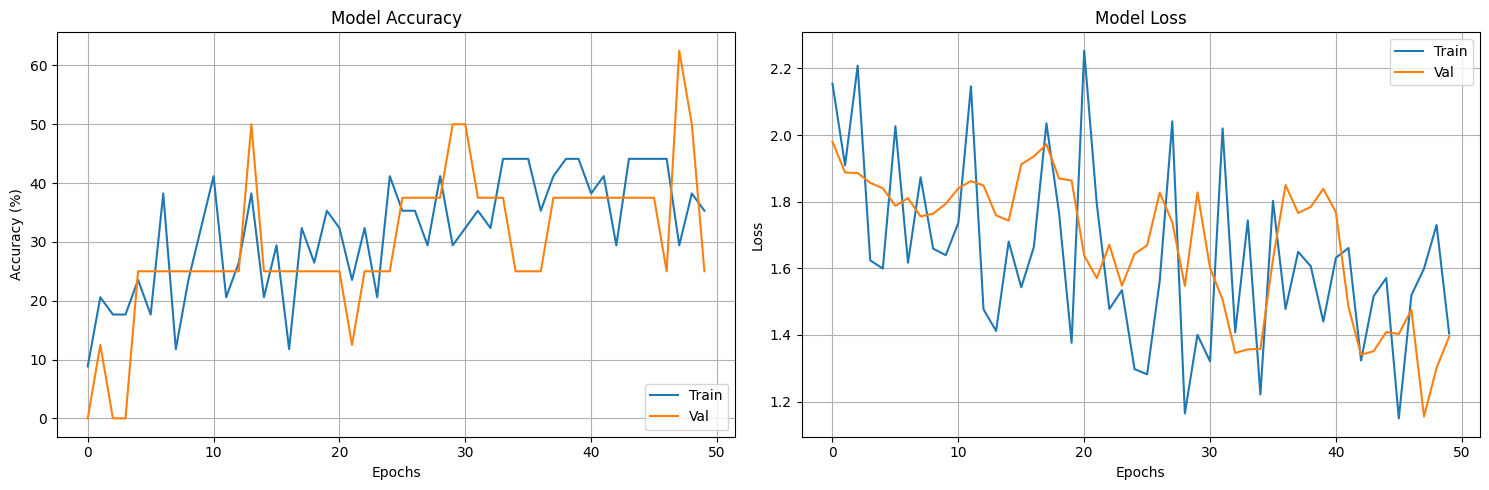

In [27]:
# 方法三：加強資料增強 (Data Augmentation)
# 修改： 對訓練集加上 RandomCrop, RandomHorizontalFlip, ColorJitter, RandomRotation 等。
# 理由： 增強模型的泛化能力，特別在資料量小的時候超有幫助。
import torchvision.transforms as transforms

transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor()
])

import torch.nn.functional as F
from torchvision import models

model = models.resnet18(weights='IMAGENET1K_V1')

#修改部分
for param in model.parameters():
    param.requires_grad = False
# for name, param in model.named_parameters():
#     if 'layer4' in name or 'fc' in name:
#         param.requires_grad = True
#     else:
#         param.requires_grad = False


num_ftrs = model.fc.in_features
num_class = 8

# change # of class from 1000 into 8 in the last layer
model.fc = nn.Linear(num_ftrs, num_class)
#print(model)

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR, StepLR
from tqdm.auto import tqdm

# 自動選擇 device：GPU 有的話就用，沒有就 fallback 到 CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

epochs = 50
model = model.to(device)  # 把模型搬到指定設備上

best_val_loss = float('inf')
best_val_acc = -1

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
lr_scheduler = CosineAnnealingLR(optimizer, T_max=len(train_loader)*epochs, eta_min=0)

for epoch in tqdm(range(epochs)):
    print(f"\n==== Epoch {epoch+1}/{epochs} ====")

    # Training
    model.train()
    total_loss = 0.0
    train_correct = 0
    total_train_samples = 0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.long().to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        train_predicted = outputs.argmax(-1)
        train_correct += (train_predicted == labels).sum().item()
        total_train_samples += labels.size(0)

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = 100. * train_correct / total_train_samples

    # Validation
    model.eval()
    total_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.long().to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

            predicted = outputs.argmax(-1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = total_val_loss / len(val_loader)
    val_accuracy = 100. * correct / total

    lr_scheduler.step()

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss

    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        torch.save(model.state_dict(), 'model_classification.pth')

    print(f'Epoch {epoch+1}/{epochs}, Train loss: {avg_train_loss:.4f}, Train acc: {train_accuracy:.2f}%, Val loss: {avg_val_loss:.4f}, Val acc: {val_accuracy:.2f}%, Best Val loss: {best_val_loss:.4f}, Best Val acc: {best_val_acc:.2f}%')

    # 儲存每一輪的表現
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

model.load_state_dict(torch.load('model_classification.pth', map_location=device))
model = model.to(device)
model.eval()

test_correct = 0
test_total = 0

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.long().to(device)

        outputs = model(images)
        predicted = outputs.argmax(-1)

        # 顯示部分預測結果
        print("Predicted:", predicted.cpu().numpy())
        print("Ground Truth:", labels.cpu().numpy())

        test_correct += (predicted == labels).sum().item()
        test_total += labels.size(0)

print(f'Test accuracy is {100. * test_correct / test_total:.2f}%')

import matplotlib.pyplot as plt 

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy
ax[0].plot(train_accuracies, label='Train')
ax[0].plot(val_accuracies, label='Val')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy (%)')
ax[0].legend(loc='lower right')
ax[0].grid(True)

# Loss
ax[1].plot(train_losses, label='Train')
ax[1].plot(val_losses, label='Val')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='upper right')
ax[1].grid(True)

plt.tight_layout()
plt.show()


Using device: cpu


  0%|          | 0/50 [00:00<?, ?it/s]


==== Epoch 1/50 ====


  2%|▏         | 1/50 [00:00<00:28,  1.75it/s]

Epoch 1/50, Train loss: 1.9989, Train acc: 8.82%, Val loss: 2.1035, Val acc: 25.00%, Best Val loss: 2.1035, Best Val acc: 25.00%

==== Epoch 2/50 ====


  4%|▍         | 2/50 [00:01<00:23,  2.02it/s]

Epoch 2/50, Train loss: 2.0896, Train acc: 20.59%, Val loss: 2.0002, Val acc: 0.00%, Best Val loss: 2.0002, Best Val acc: 25.00%

==== Epoch 3/50 ====


  6%|▌         | 3/50 [00:01<00:21,  2.21it/s]

Epoch 3/50, Train loss: 1.9242, Train acc: 23.53%, Val loss: 1.9517, Val acc: 0.00%, Best Val loss: 1.9517, Best Val acc: 25.00%

==== Epoch 4/50 ====


  8%|▊         | 4/50 [00:01<00:19,  2.34it/s]

Epoch 4/50, Train loss: 1.9444, Train acc: 32.35%, Val loss: 1.9364, Val acc: 0.00%, Best Val loss: 1.9364, Best Val acc: 25.00%

==== Epoch 5/50 ====


 10%|█         | 5/50 [00:02<00:18,  2.41it/s]

Epoch 5/50, Train loss: 1.7366, Train acc: 32.35%, Val loss: 1.8734, Val acc: 12.50%, Best Val loss: 1.8734, Best Val acc: 25.00%

==== Epoch 6/50 ====


 12%|█▏        | 6/50 [00:02<00:18,  2.35it/s]

Epoch 6/50, Train loss: 1.8811, Train acc: 23.53%, Val loss: 1.8415, Val acc: 25.00%, Best Val loss: 1.8415, Best Val acc: 25.00%

==== Epoch 7/50 ====


 14%|█▍        | 7/50 [00:03<00:19,  2.20it/s]

Epoch 7/50, Train loss: 1.8039, Train acc: 17.65%, Val loss: 1.7770, Val acc: 50.00%, Best Val loss: 1.7770, Best Val acc: 50.00%

==== Epoch 8/50 ====


 16%|█▌        | 8/50 [00:03<00:18,  2.22it/s]

Epoch 8/50, Train loss: 1.8646, Train acc: 29.41%, Val loss: 1.7488, Val acc: 37.50%, Best Val loss: 1.7488, Best Val acc: 50.00%

==== Epoch 9/50 ====


 18%|█▊        | 9/50 [00:04<00:18,  2.22it/s]

Epoch 9/50, Train loss: 1.4449, Train acc: 41.18%, Val loss: 1.6979, Val acc: 37.50%, Best Val loss: 1.6979, Best Val acc: 50.00%

==== Epoch 10/50 ====


 20%|██        | 10/50 [00:04<00:17,  2.27it/s]

Epoch 10/50, Train loss: 1.3968, Train acc: 29.41%, Val loss: 1.6721, Val acc: 37.50%, Best Val loss: 1.6721, Best Val acc: 50.00%

==== Epoch 11/50 ====


 22%|██▏       | 11/50 [00:04<00:16,  2.30it/s]

Epoch 11/50, Train loss: 1.6189, Train acc: 20.59%, Val loss: 1.5599, Val acc: 25.00%, Best Val loss: 1.5599, Best Val acc: 50.00%

==== Epoch 12/50 ====


 24%|██▍       | 12/50 [00:05<00:16,  2.32it/s]

Epoch 12/50, Train loss: 1.4763, Train acc: 35.29%, Val loss: 1.5851, Val acc: 25.00%, Best Val loss: 1.5599, Best Val acc: 50.00%

==== Epoch 13/50 ====


 26%|██▌       | 13/50 [00:05<00:16,  2.31it/s]

Epoch 13/50, Train loss: 1.7959, Train acc: 26.47%, Val loss: 1.5619, Val acc: 25.00%, Best Val loss: 1.5599, Best Val acc: 50.00%

==== Epoch 14/50 ====


 28%|██▊       | 14/50 [00:06<00:15,  2.27it/s]

Epoch 14/50, Train loss: 2.0068, Train acc: 26.47%, Val loss: 1.6247, Val acc: 12.50%, Best Val loss: 1.5599, Best Val acc: 50.00%

==== Epoch 15/50 ====


 30%|███       | 15/50 [00:06<00:15,  2.30it/s]

Epoch 15/50, Train loss: 1.2781, Train acc: 26.47%, Val loss: 1.5594, Val acc: 25.00%, Best Val loss: 1.5594, Best Val acc: 50.00%

==== Epoch 16/50 ====


 32%|███▏      | 16/50 [00:07<00:14,  2.33it/s]

Epoch 16/50, Train loss: 2.0263, Train acc: 17.65%, Val loss: 1.5570, Val acc: 25.00%, Best Val loss: 1.5570, Best Val acc: 50.00%

==== Epoch 17/50 ====


 34%|███▍      | 17/50 [00:07<00:13,  2.37it/s]

Epoch 17/50, Train loss: 1.2583, Train acc: 32.35%, Val loss: 1.6101, Val acc: 12.50%, Best Val loss: 1.5570, Best Val acc: 50.00%

==== Epoch 18/50 ====


 36%|███▌      | 18/50 [00:07<00:13,  2.43it/s]

Epoch 18/50, Train loss: 1.4519, Train acc: 41.18%, Val loss: 1.6404, Val acc: 12.50%, Best Val loss: 1.5570, Best Val acc: 50.00%

==== Epoch 19/50 ====


 38%|███▊      | 19/50 [00:08<00:12,  2.40it/s]

Epoch 19/50, Train loss: 1.6844, Train acc: 38.24%, Val loss: 1.6436, Val acc: 12.50%, Best Val loss: 1.5570, Best Val acc: 50.00%

==== Epoch 20/50 ====


 40%|████      | 20/50 [00:08<00:12,  2.42it/s]

Epoch 20/50, Train loss: 1.9098, Train acc: 32.35%, Val loss: 1.6206, Val acc: 25.00%, Best Val loss: 1.5570, Best Val acc: 50.00%

==== Epoch 21/50 ====


 42%|████▏     | 21/50 [00:09<00:11,  2.44it/s]

Epoch 21/50, Train loss: 1.3344, Train acc: 35.29%, Val loss: 1.6048, Val acc: 25.00%, Best Val loss: 1.5570, Best Val acc: 50.00%

==== Epoch 22/50 ====


 44%|████▍     | 22/50 [00:09<00:11,  2.44it/s]

Epoch 22/50, Train loss: 1.6415, Train acc: 26.47%, Val loss: 1.5181, Val acc: 50.00%, Best Val loss: 1.5181, Best Val acc: 50.00%

==== Epoch 23/50 ====


 46%|████▌     | 23/50 [00:09<00:10,  2.48it/s]

Epoch 23/50, Train loss: 1.7270, Train acc: 38.24%, Val loss: 1.4204, Val acc: 37.50%, Best Val loss: 1.4204, Best Val acc: 50.00%

==== Epoch 24/50 ====


 48%|████▊     | 24/50 [00:10<00:10,  2.38it/s]

Epoch 24/50, Train loss: 1.4706, Train acc: 23.53%, Val loss: 1.2993, Val acc: 37.50%, Best Val loss: 1.2993, Best Val acc: 50.00%

==== Epoch 25/50 ====


 50%|█████     | 25/50 [00:10<00:10,  2.37it/s]

Epoch 25/50, Train loss: 1.6226, Train acc: 38.24%, Val loss: 1.4674, Val acc: 25.00%, Best Val loss: 1.2993, Best Val acc: 50.00%

==== Epoch 26/50 ====


 52%|█████▏    | 26/50 [00:11<00:10,  2.27it/s]

Epoch 26/50, Train loss: 2.0010, Train acc: 32.35%, Val loss: 1.3948, Val acc: 25.00%, Best Val loss: 1.2993, Best Val acc: 50.00%

==== Epoch 27/50 ====


 54%|█████▍    | 27/50 [00:11<00:10,  2.16it/s]

Epoch 27/50, Train loss: 1.7339, Train acc: 29.41%, Val loss: 1.3503, Val acc: 37.50%, Best Val loss: 1.2993, Best Val acc: 50.00%

==== Epoch 28/50 ====


 56%|█████▌    | 28/50 [00:12<00:08,  2.45it/s]

Epoch 28/50, Train loss: 1.5105, Train acc: 29.41%, Val loss: 1.6080, Val acc: 25.00%, Best Val loss: 1.2993, Best Val acc: 50.00%

==== Epoch 29/50 ====


 58%|█████▊    | 29/50 [00:12<00:07,  2.80it/s]

Epoch 29/50, Train loss: 1.9767, Train acc: 47.06%, Val loss: 1.5757, Val acc: 37.50%, Best Val loss: 1.2993, Best Val acc: 50.00%

==== Epoch 30/50 ====


 60%|██████    | 30/50 [00:12<00:06,  3.11it/s]

Epoch 30/50, Train loss: 1.5282, Train acc: 38.24%, Val loss: 1.6543, Val acc: 37.50%, Best Val loss: 1.2993, Best Val acc: 50.00%

==== Epoch 31/50 ====


 62%|██████▏   | 31/50 [00:12<00:05,  3.42it/s]

Epoch 31/50, Train loss: 1.5380, Train acc: 35.29%, Val loss: 1.4812, Val acc: 25.00%, Best Val loss: 1.2993, Best Val acc: 50.00%

==== Epoch 32/50 ====


 64%|██████▍   | 32/50 [00:12<00:04,  3.62it/s]

Epoch 32/50, Train loss: 1.4822, Train acc: 35.29%, Val loss: 1.5593, Val acc: 25.00%, Best Val loss: 1.2993, Best Val acc: 50.00%

==== Epoch 33/50 ====


 66%|██████▌   | 33/50 [00:13<00:04,  3.76it/s]

Epoch 33/50, Train loss: 1.6322, Train acc: 35.29%, Val loss: 1.5609, Val acc: 25.00%, Best Val loss: 1.2993, Best Val acc: 50.00%

==== Epoch 34/50 ====


 68%|██████▊   | 34/50 [00:13<00:04,  3.93it/s]

Epoch 34/50, Train loss: 1.4801, Train acc: 32.35%, Val loss: 1.3419, Val acc: 50.00%, Best Val loss: 1.2993, Best Val acc: 50.00%

==== Epoch 35/50 ====
Epoch 35/50, Train loss: 1.5657, Train acc: 26.47%, Val loss: 1.5938, Val acc: 37.50%, Best Val loss: 1.2993, Best Val acc: 50.00%


 70%|███████   | 35/50 [00:13<00:03,  4.23it/s]


==== Epoch 36/50 ====


 72%|███████▏  | 36/50 [00:13<00:03,  4.04it/s]

Epoch 36/50, Train loss: 1.8553, Train acc: 32.35%, Val loss: 1.4620, Val acc: 50.00%, Best Val loss: 1.2993, Best Val acc: 50.00%

==== Epoch 37/50 ====
Epoch 37/50, Train loss: 1.4998, Train acc: 38.24%, Val loss: 1.3951, Val acc: 37.50%, Best Val loss: 1.2993, Best Val acc: 50.00%


 74%|███████▍  | 37/50 [00:14<00:03,  4.27it/s]


==== Epoch 38/50 ====


 76%|███████▌  | 38/50 [00:14<00:02,  4.13it/s]

Epoch 38/50, Train loss: 1.7731, Train acc: 32.35%, Val loss: 1.4837, Val acc: 25.00%, Best Val loss: 1.2993, Best Val acc: 50.00%

==== Epoch 39/50 ====


 78%|███████▊  | 39/50 [00:14<00:02,  4.29it/s]

Epoch 39/50, Train loss: 1.5625, Train acc: 35.29%, Val loss: 1.3243, Val acc: 50.00%, Best Val loss: 1.2993, Best Val acc: 50.00%

==== Epoch 40/50 ====


 80%|████████  | 40/50 [00:14<00:02,  4.48it/s]

Epoch 40/50, Train loss: 1.4533, Train acc: 32.35%, Val loss: 1.3444, Val acc: 37.50%, Best Val loss: 1.2993, Best Val acc: 50.00%

==== Epoch 41/50 ====


 82%|████████▏ | 41/50 [00:14<00:01,  4.62it/s]

Epoch 41/50, Train loss: 1.9082, Train acc: 35.29%, Val loss: 1.3593, Val acc: 37.50%, Best Val loss: 1.2993, Best Val acc: 50.00%

==== Epoch 42/50 ====


 84%|████████▍ | 42/50 [00:15<00:01,  4.28it/s]

Epoch 42/50, Train loss: 1.2662, Train acc: 47.06%, Val loss: 1.2743, Val acc: 62.50%, Best Val loss: 1.2743, Best Val acc: 62.50%

==== Epoch 43/50 ====


 86%|████████▌ | 43/50 [00:15<00:01,  4.23it/s]

Epoch 43/50, Train loss: 1.6840, Train acc: 29.41%, Val loss: 1.2445, Val acc: 62.50%, Best Val loss: 1.2445, Best Val acc: 62.50%

==== Epoch 44/50 ====
Epoch 44/50, Train loss: 1.6835, Train acc: 35.29%, Val loss: 1.1231, Val acc: 37.50%, Best Val loss: 1.1231, Best Val acc: 62.50%


 90%|█████████ | 45/50 [00:15<00:01,  4.53it/s]


==== Epoch 45/50 ====
Epoch 45/50, Train loss: 1.9928, Train acc: 32.35%, Val loss: 1.2337, Val acc: 37.50%, Best Val loss: 1.1231, Best Val acc: 62.50%


 92%|█████████▏| 46/50 [00:16<00:00,  4.72it/s]


==== Epoch 46/50 ====
Epoch 46/50, Train loss: 1.4087, Train acc: 35.29%, Val loss: 1.4011, Val acc: 37.50%, Best Val loss: 1.1231, Best Val acc: 62.50%


 94%|█████████▍| 47/50 [00:16<00:00,  4.82it/s]


==== Epoch 47/50 ====
Epoch 47/50, Train loss: 1.4381, Train acc: 20.59%, Val loss: 1.2753, Val acc: 37.50%, Best Val loss: 1.1231, Best Val acc: 62.50%

==== Epoch 48/50 ====


 96%|█████████▌| 48/50 [00:16<00:00,  4.46it/s]

Epoch 48/50, Train loss: 1.8890, Train acc: 38.24%, Val loss: 1.0063, Val acc: 87.50%, Best Val loss: 1.0063, Best Val acc: 87.50%

==== Epoch 49/50 ====


 98%|█████████▊| 49/50 [00:16<00:00,  4.50it/s]

Epoch 49/50, Train loss: 1.4525, Train acc: 32.35%, Val loss: 1.4410, Val acc: 62.50%, Best Val loss: 1.0063, Best Val acc: 87.50%

==== Epoch 50/50 ====


100%|██████████| 50/50 [00:17<00:00,  2.93it/s]

Epoch 50/50, Train loss: 1.6634, Train acc: 35.29%, Val loss: 1.4620, Val acc: 62.50%, Best Val loss: 1.0063, Best Val acc: 87.50%
Predicted: [0 0 1 1 2 2 2 3]
Ground Truth: [0 0 1 1 2 2 3 3]
Test accuracy is 87.50%


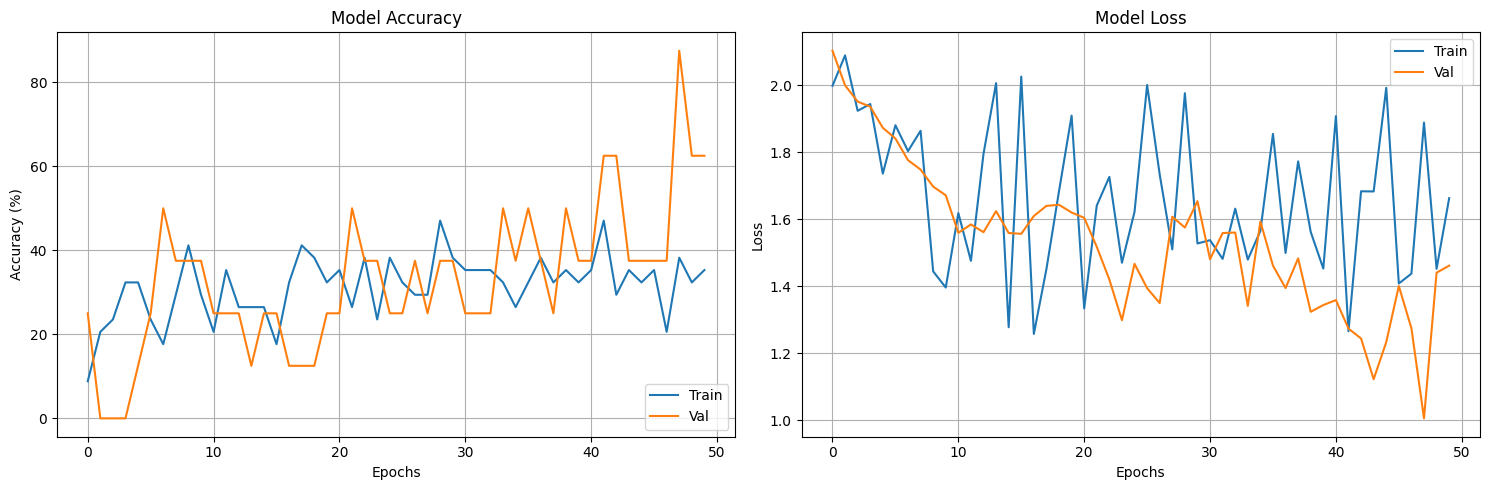

In [28]:
# 方法四：調整 Learning Rate 與 Scheduler
# 修改： 嘗試不同的 learning rate（例如從 1e-3 改成 5e-4），或換成 StepLR。
# 理由： 不同學習率和 decay 方式會讓模型收斂速度與最終表現差很多。


import torch.nn.functional as F
from torchvision import models

model = models.resnet18(weights='IMAGENET1K_V1')

#修改部分
for param in model.parameters():
    param.requires_grad = False



num_ftrs = model.fc.in_features
num_class = 8

# change # of class from 1000 into 8 in the last layer
model.fc = nn.Linear(num_ftrs, num_class)
#print(model)

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR, StepLR
from tqdm.auto import tqdm

# 自動選擇 device：GPU 有的話就用，沒有就 fallback 到 CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

epochs = 50
model = model.to(device)  # 把模型搬到指定設備上

best_val_loss = float('inf')
best_val_acc = -1

criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=1e-3)
optimizer = torch.optim.Adam(model.parameters(), lr=5e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

lr_scheduler = CosineAnnealingLR(optimizer, T_max=len(train_loader)*epochs, eta_min=0)

for epoch in tqdm(range(epochs)):
    print(f"\n==== Epoch {epoch+1}/{epochs} ====")

    # Training
    model.train()
    total_loss = 0.0
    train_correct = 0
    total_train_samples = 0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.long().to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        train_predicted = outputs.argmax(-1)
        train_correct += (train_predicted == labels).sum().item()
        total_train_samples += labels.size(0)

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = 100. * train_correct / total_train_samples

    # Validation
    model.eval()
    total_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.long().to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

            predicted = outputs.argmax(-1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = total_val_loss / len(val_loader)
    val_accuracy = 100. * correct / total

    lr_scheduler.step()

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss

    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        torch.save(model.state_dict(), 'model_classification.pth')

    print(f'Epoch {epoch+1}/{epochs}, Train loss: {avg_train_loss:.4f}, Train acc: {train_accuracy:.2f}%, Val loss: {avg_val_loss:.4f}, Val acc: {val_accuracy:.2f}%, Best Val loss: {best_val_loss:.4f}, Best Val acc: {best_val_acc:.2f}%')

    # 儲存每一輪的表現
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

model.load_state_dict(torch.load('model_classification.pth', map_location=device))
model = model.to(device)
model.eval()

test_correct = 0
test_total = 0

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.long().to(device)

        outputs = model(images)
        predicted = outputs.argmax(-1)

        # 顯示部分預測結果
        print("Predicted:", predicted.cpu().numpy())
        print("Ground Truth:", labels.cpu().numpy())

        test_correct += (predicted == labels).sum().item()
        test_total += labels.size(0)

print(f'Test accuracy is {100. * test_correct / test_total:.2f}%')

import matplotlib.pyplot as plt 

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy
ax[0].plot(train_accuracies, label='Train')
ax[0].plot(val_accuracies, label='Val')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy (%)')
ax[0].legend(loc='lower right')
ax[0].grid(True)

# Loss
ax[1].plot(train_losses, label='Train')
ax[1].plot(val_losses, label='Val')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='upper right')
ax[1].grid(True)

plt.tight_layout()
plt.show()

